In [1]:
library(tidyverse)
library(car)
library(patchwork)
options(repr.plot.width = 15, repr.plot.height = 10, repr.plot.res = 200)
theme_set(theme_classic(25))

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.5     ✔ dplyr   1.0.3
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




In [2]:
colz <- read_delim(pipe("cat ../dfe_and_alpha_slim/simout/allsims.txt | head -n1"), delim = "\t") %>% names()
dfe_df <- read_delim(pipe("cat ../dfe_and_alpha_slim/simout/allsims.txt | grep -v n"), delim = "\t", col_names = colz) %>% 
    mutate(fixed = as.numeric(fixed), alpha = as.numeric(alpha)) %>% 
    mutate(
        Ne = (10*N_A + T_B + T_0)/((10*N_A/N_A + T_B/N_B + T_0/N_0)),
        alpha_count = log10(fixed*alpha)
    )

idx <- dfe_df %>%
    mutate(idx = 1:n()) %>% 
    pull(idx)

est_true <- map_df(idx, function(i){
    sfs_i <- as.numeric(str_split(dfe_df$sfs_neutral[i], ",", simplify = T))
    n <- length(sfs_i)
    sfs_i <- sfs_i[-c(1,n)]
    index <- 1:length(sfs_i)
    pi_est <- sum(index*(n-index)*sfs_i) / (choose(n, 2)) / (4*300*200)
    theta <- 4*((dfe_df$Ne[i]))*dfe_df$mu[i]
    tibble(pi_est = pi_est, theta = theta, beta = pi_est/theta)
})

#example
i <- sample(1:nrow(dfe_df), 1)
(sfs_i <- as.numeric(str_split(dfe_df$sfs_neutral[i], ",", simplify = T)))
(n <- length(sfs_i))
(sfs_i <- sfs_i[-c(n)])
(index <- 1:length(sfs_i))
n-index

dfe_df <- bind_cols(dfe_df, est_true)
names(dfe_df)



── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  n = col_character(),
  sfs_neutral = col_character(),
  sfs_selected = col_character(),
  alpha = col_character(),
  fixed = col_character(),
  mu = col_character(),
  c = col_character(),
  loci = col_character(),
  neg_mean = col_character(),
  neg_shape = col_character(),
  pos_mean = col_character(),
  pos_shape = col_character(),
  neg_prop = col_character(),
  N_A = col_character(),
  N_B = col_character(),
  N_0 = col_character(),
  T_B = col_character(),
  T_0 = col_character()
)



── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  n = col_double(),
  sfs_neutral = col_character(),
  sfs_selected = col_character(),
  alpha = col_character(),
  fixed = col_character(),
  mu = col_double(),
  c = col_dou

[1] 9974  914  256  160   87   54   47   36   27   23   16   20   13   18   14
[16]   21   15   11   16   13 1140

[1] 21

[1] 9974  914  256  160   87   54   47   36   27   23   16   20   13   18   14
[16]   21   15   11   16   13

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20

[1] 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1

[1] "n"            "sfs_neutral"  "sfs_selected" "alpha"        "fixed"       
 [6] "mu"           "c"            "loci"         "neg_mean"     "neg_shape"   
[11] "pos_mean"     "pos_shape"    "neg_prop"     "N_A"          "N_B"         
[16] "N_0"          "T_B"          "T_0"          "Ne"           "alpha_count" 
[21] "pi_est"       "theta"        "beta"

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



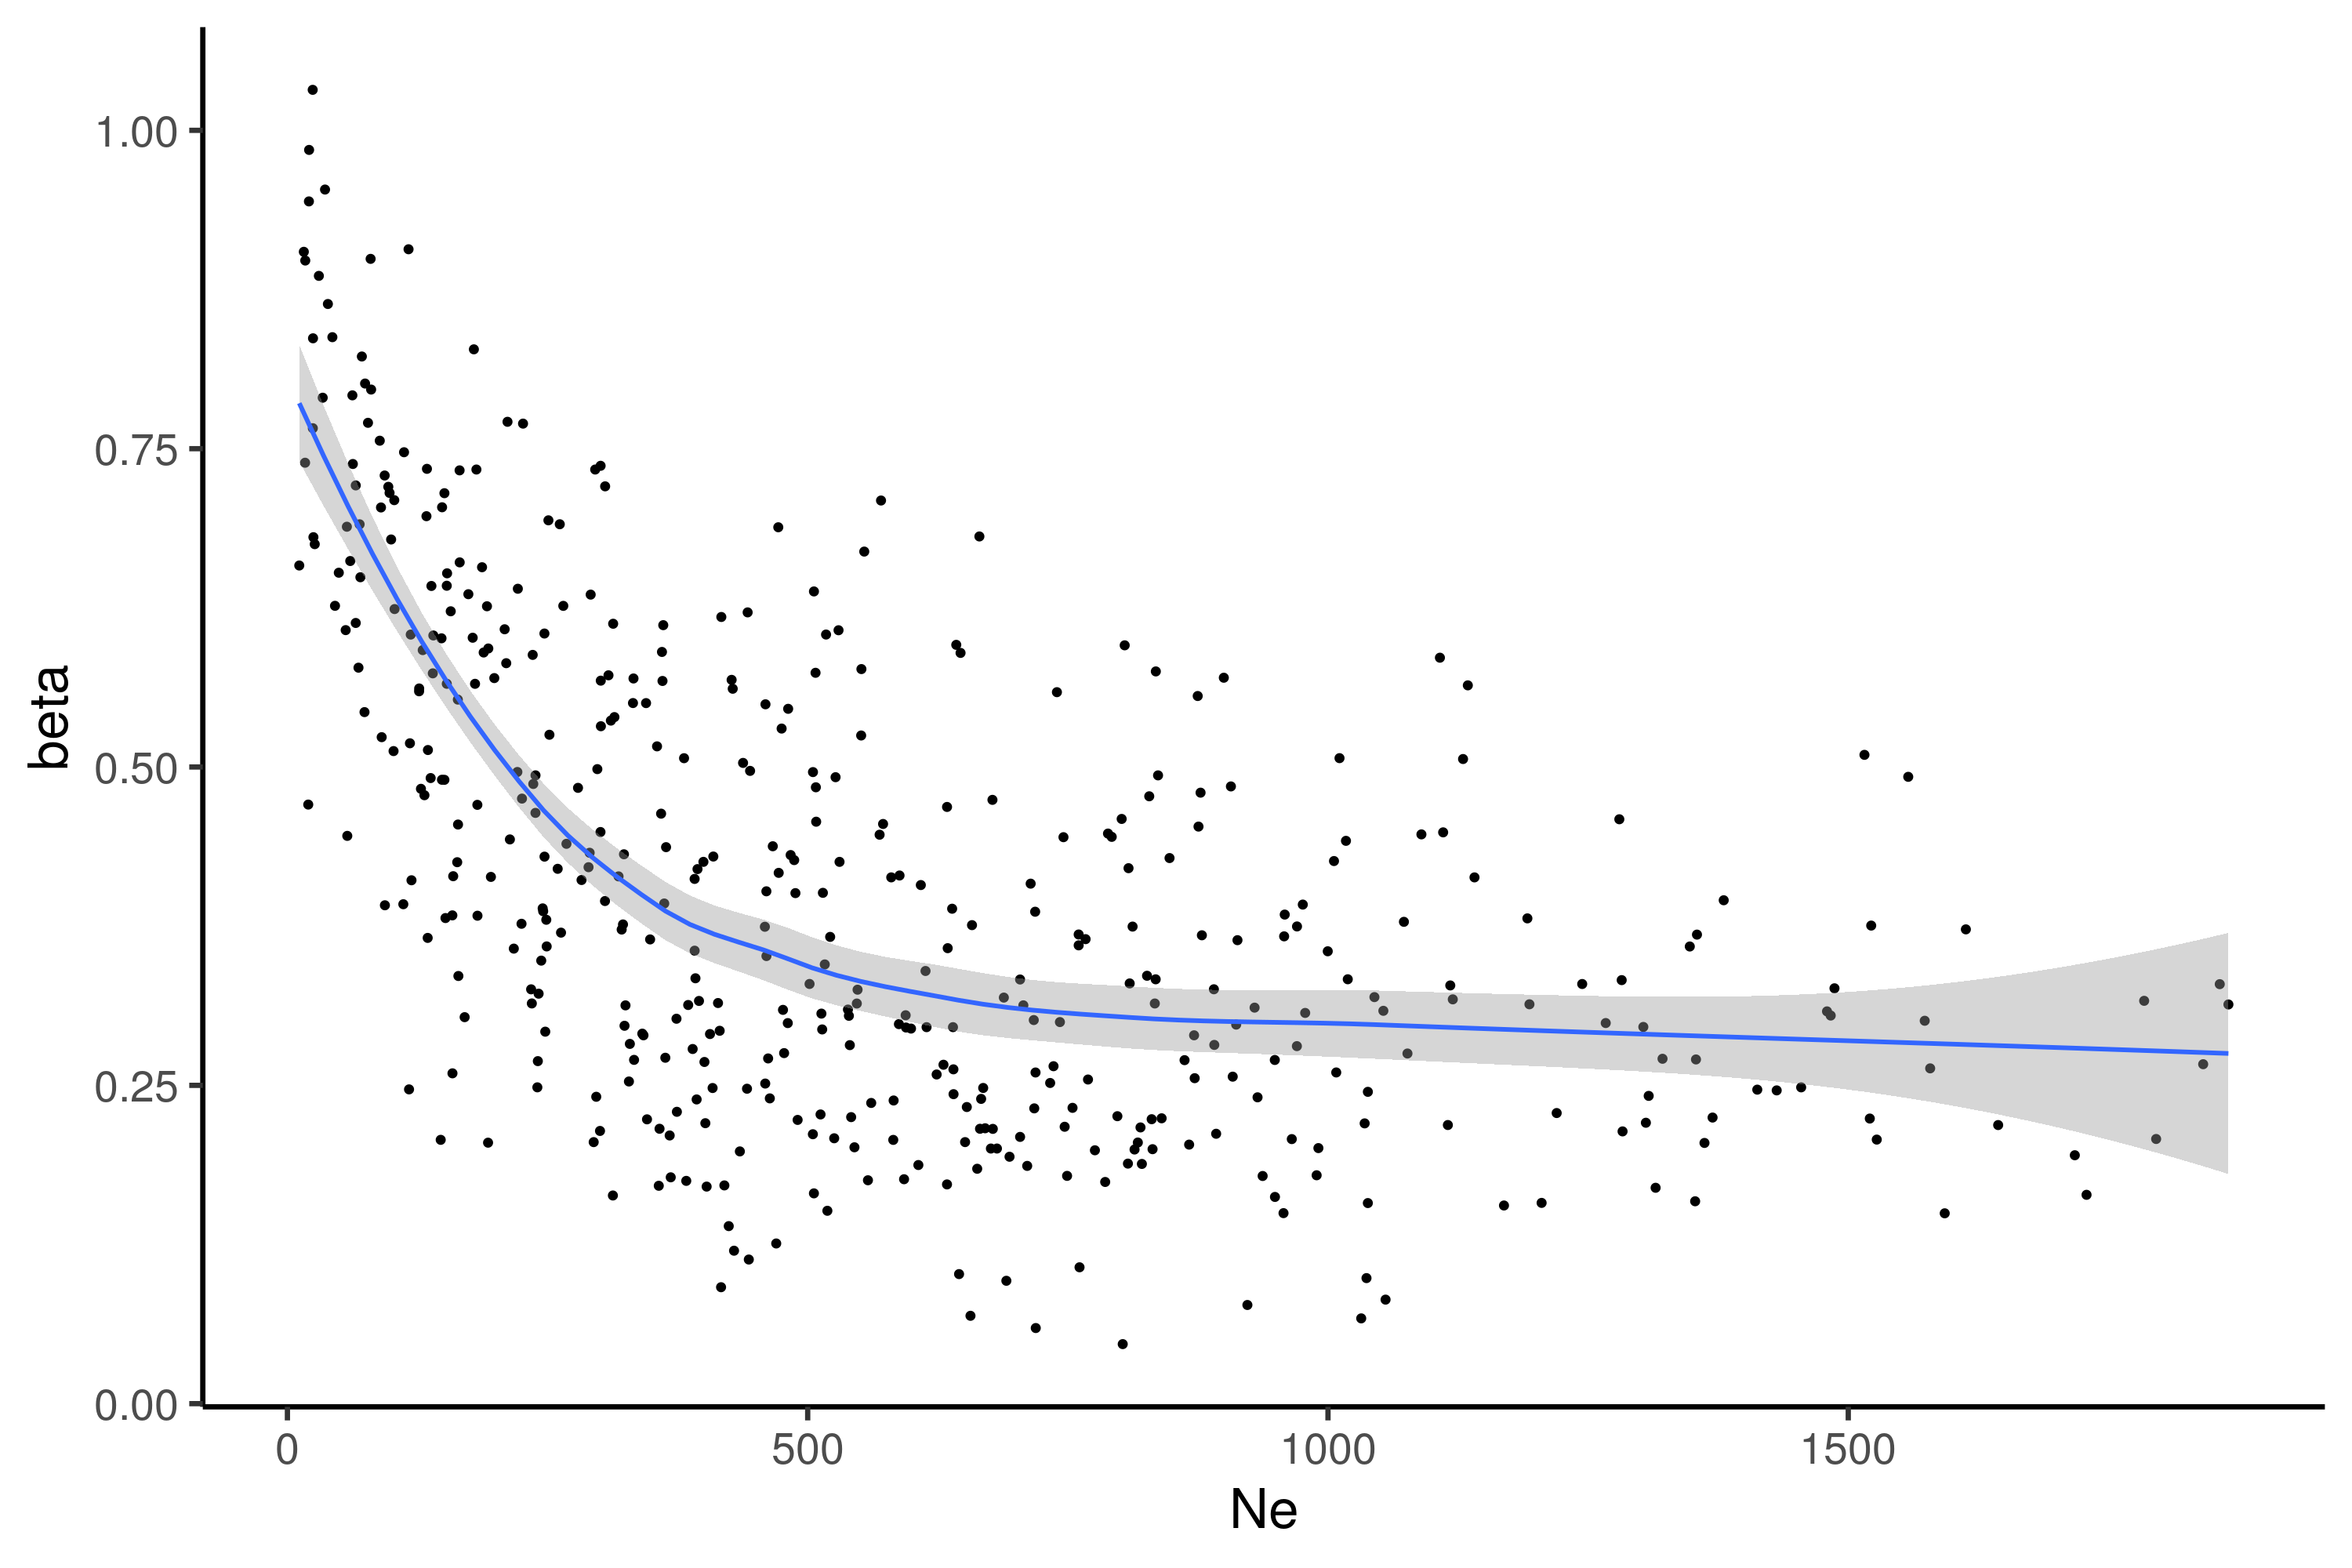

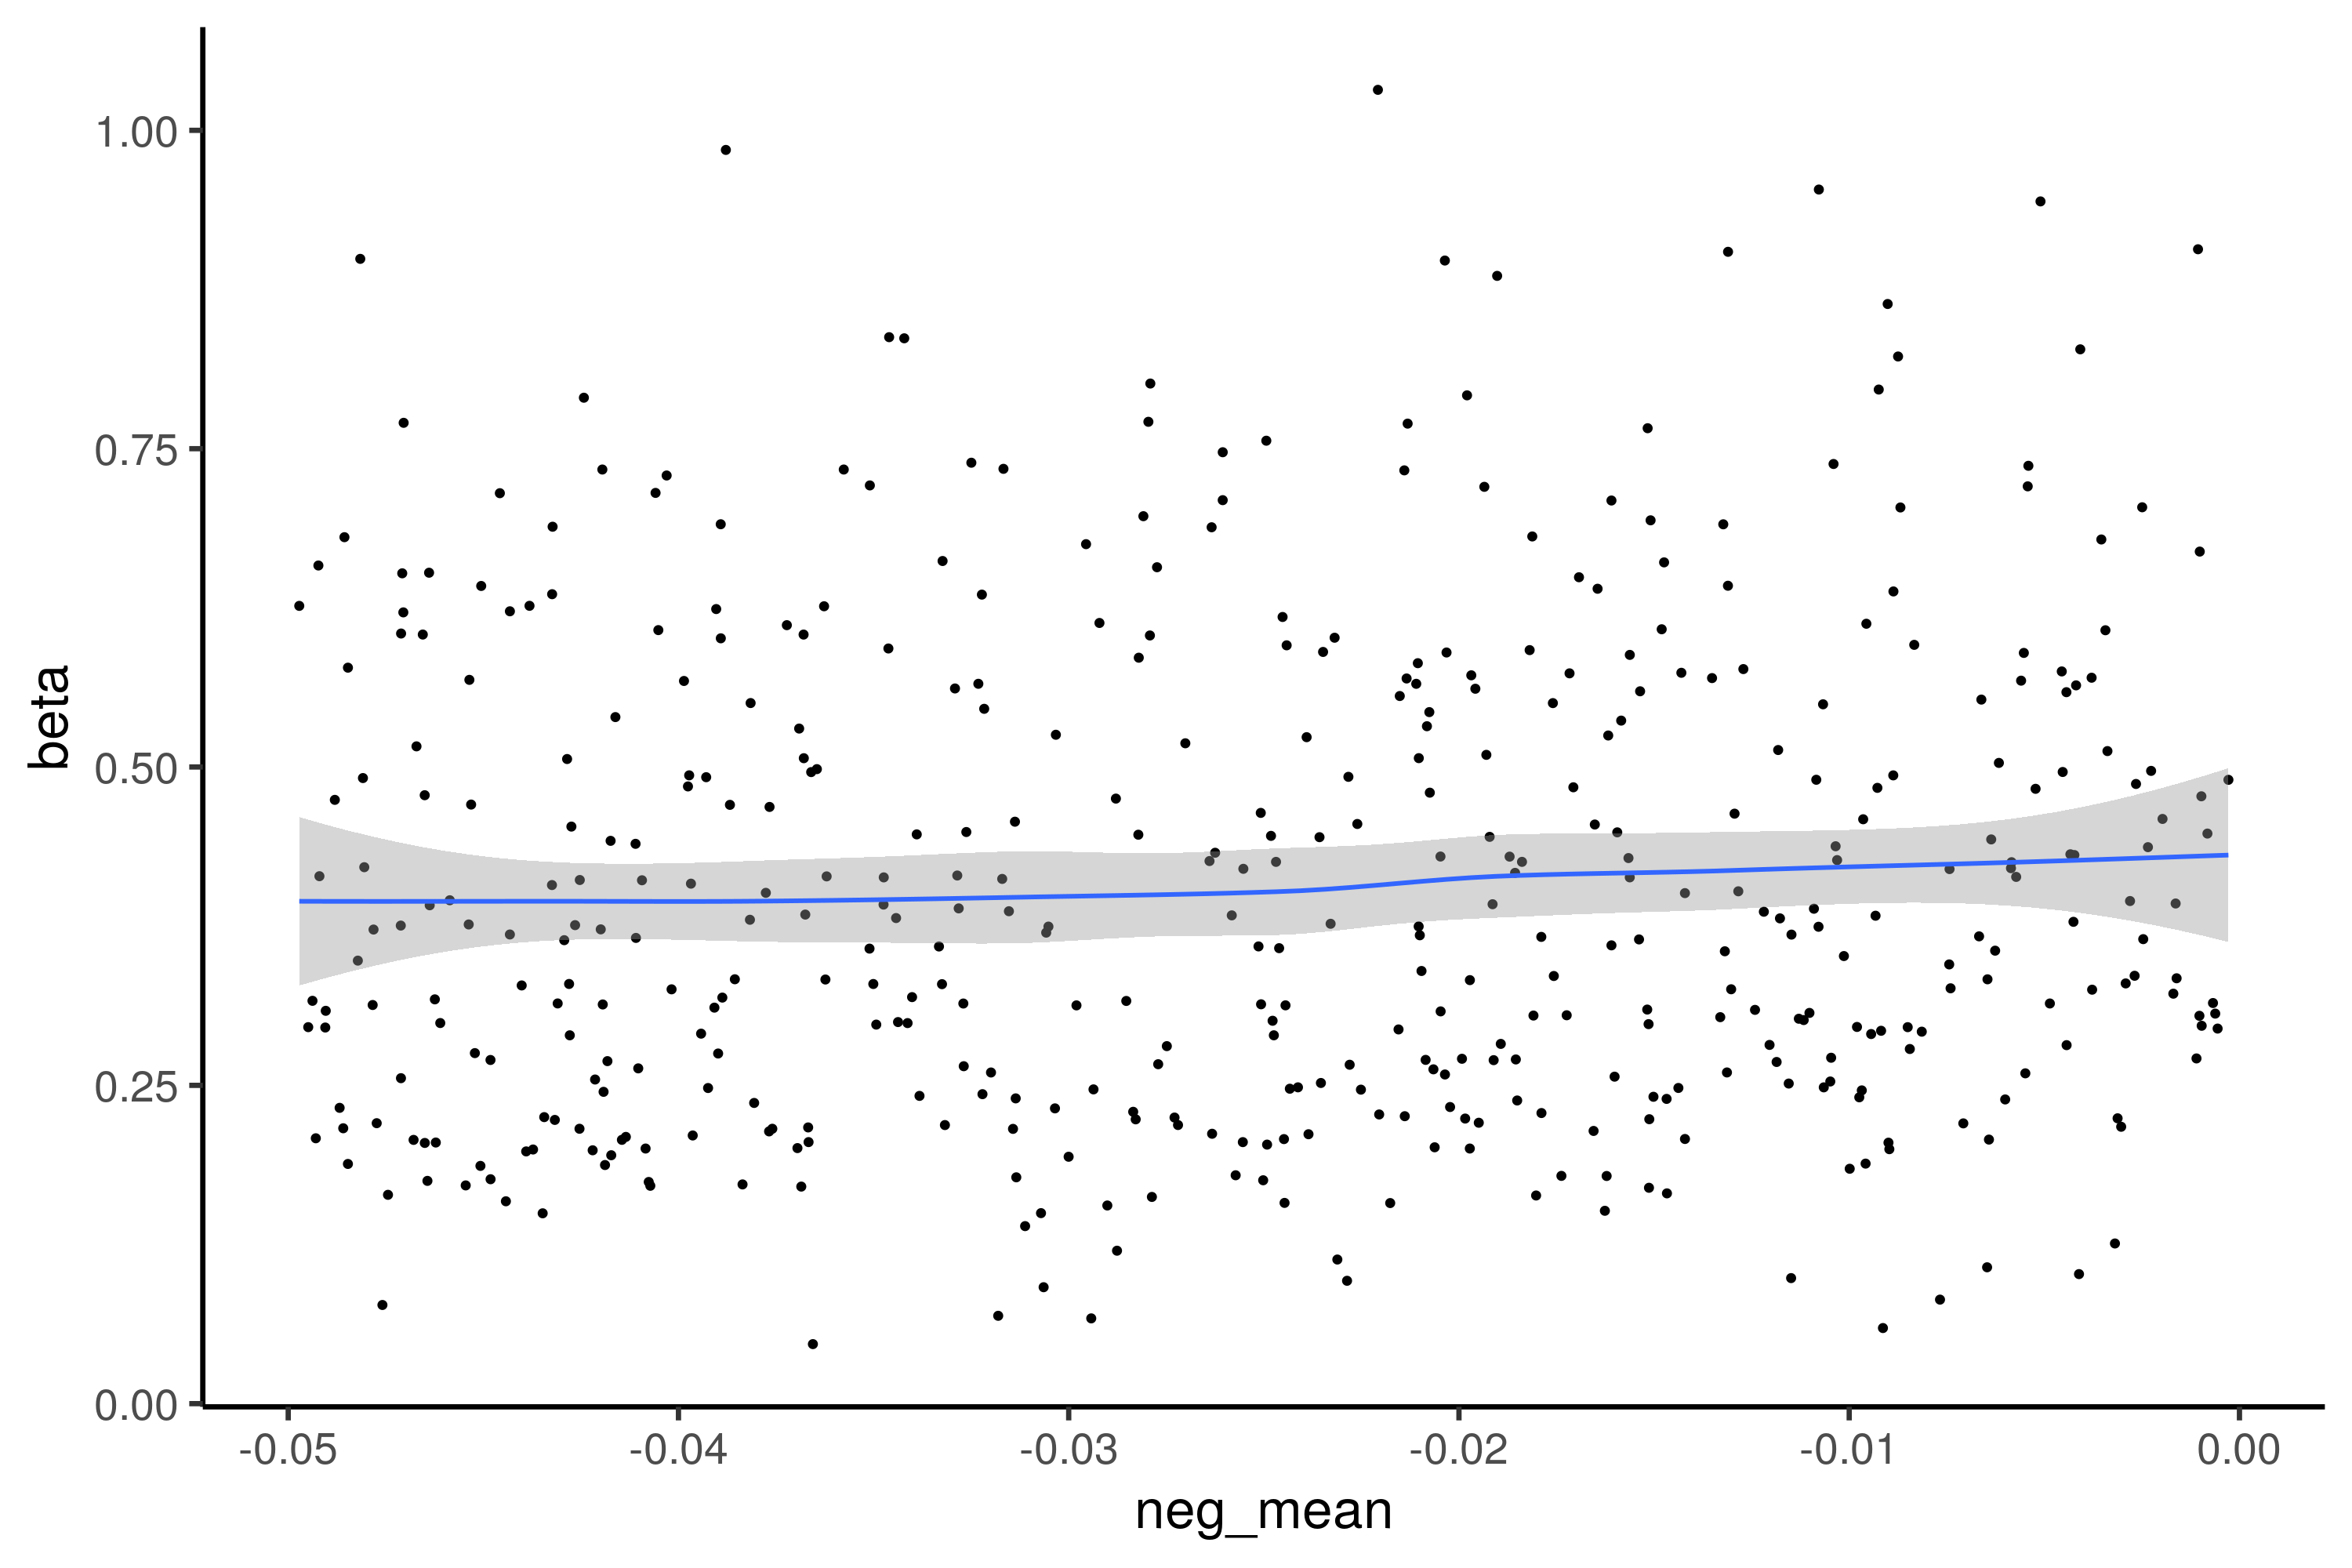

In [3]:
dfe_df %>% 
filter(n == 20) %>% 
ggplot(aes(Ne, beta)) +
    geom_point() +
    geom_smooth()


dfe_df %>% 
filter(n == 20) %>% 
ggplot(aes(neg_mean, beta)) +
    geom_point() +
    geom_smooth()


n  
1  12
2  20
3 100
4 110
5  12
6  20
  sfs_neutral                                                                                                                                                                                                                               
1 8047,222,17,8,10,13,9,11,10,2,6,6,61                                                                                                                                                                                                      
2 7926,314,34,10,7,11,8,5,2,3,6,4,5,5,3,7,5,1,6,2,58                                                                                                                                                                                        
3 6938,1012,171,79,35,11,5,2,2,3,7,4,2,1,2,2,0,4,2,0,2,6,3,1,1,2,0,3,2,2,2,1,1,0,0,2,0,0,1,0,2,1,0,2,1,1,2,0,1,2,0,3,0,2,3,2,1,0,1,1,1,1,0,3,0,1,0,1,0,1,1,1,1,1,1,0,0,0,0,1,0,3,1,1,0,3,1,2,0,0,1,1,0,0,0,0,1,0,1,0,57                     
4 6936,960,221,66,36,18,10,6,8,2,3,3,0,2,1,4,2,2,2,1,3,0,1,2,1,2,1,1,2,1,0,2,5,1,0,1,1,1,0,3,1,0,0,2,0,1,1,0,1,1,2,1,1,2,0,1,2,1,0,1,1,1,2,0,0,1,2,3,1,0,1,2,0,2,0,0,0,2,1,0,0,1,1,0,1,0,0,0,1,0,0,1,1,1,0,2,1,2,1,1,0,1,0,0,1,0,0,0,1,0,57 
5 4524,148,64,48,23,17,24,10,6,14,10,11,860                                                                                                                                                                                                 
6 4407,226,54,41,27,19,19,20,5,18,6,9,6,5,5,8,8,7,4,7,858                                                                                                                                                                                   
  sfs_selected                                                                                                                                                                                                                                          
1  28051,659,79,26,31,18,19,13,10,6,7,6,189                                                                                                                                                                                                             
2  27645,963,105,51,35,17,16,9,14,12,8,8,5,5,7,7,6,5,7,5,184                                                                                                                                                                                            
3  24587,3096,583,200,80,52,29,30,15,8,18,12,11,4,8,11,3,7,7,12,7,6,5,4,4,6,5,6,2,4,6,4,4,5,4,1,1,0,4,0,3,2,2,2,4,4,5,1,2,1,0,1,0,3,0,2,0,2,1,1,2,3,0,1,0,0,0,0,1,4,2,1,1,3,2,1,1,0,2,3,2,1,2,0,0,2,1,1,1,1,0,0,0,0,2,1,1,2,0,0,183                     
4  24305,3218,665,236,99,52,33,30,19,9,12,13,14,10,9,14,5,7,7,8,5,4,4,9,3,3,6,4,5,6,6,3,0,2,4,2,2,4,2,2,2,1,2,4,4,1,0,1,5,2,2,4,5,1,0,0,2,0,2,0,1,1,0,1,1,2,2,3,0,0,1,2,2,2,0,1,0,2,0,2,1,2,2,3,0,1,1,1,2,1,0,0,2,0,3,1,1,2,0,1,0,1,0,2,0,0,0,0,1,0,184 
5  15451,568,182,104,71,59,56,42,26,27,24,24,2598                                                                                                                                                                                                       
6  15100,726,216,109,99,44,59,44,36,34,23,21,10,20,17,14,18,17,13,22,2590                                                                                                                                                                               
  alpha     fixed mu    c     loci  neg_mean    neg_shape ⋯ N_A N_B  N_0  T_B
1 0.0669456  239  3e-06 1e-06 2e+07 -0.02207700 0.205397  ⋯  21  487 1620 15 
2 0.0669456  239  3e-06 1e-06 2e+07 -0.02207700 0.205397  ⋯  21  487 1620 15 
3 0.0669456  239  3e-06 1e-06 2e+07 -0.02207700 0.205397  ⋯  21  487 1620 15 
4 0.0669456  239  3e-06 1e-06 2e+07 -0.02207700 0.205397  ⋯  21  487 1620 15 
5 0.1623530 3400  3e-06 1e-06 2e+07 -0.00899399 0.246151  ⋯ 188 1441 1702 25 
6 0.1623530 3400  3e-06 1e-06 2e+07 -0.00899399 0.246151  ⋯ 188 1441 1702 25 
  T_0 Ne    

% latex table generated in R 3.6.3 by xtable 1.8-4 package
% Thu Jun 24 13:03:38 2021
\begin{table}[ht]
\centering
\begin{tabular}{rrrrr}
  \hline
 & Estimate & Std. Error & t value & Pr($>$$|$t$|$) \\ 
  \hline
(Intercept) & 3.800 & 0.196 & 19.424 & 6.07e-60 \\ 
  theta & 16.641 & 1.288 & 12.923 & 2.99e-32 \\ 
  neg\_prop & -3.999 & 0.207 & -19.314 & 1.83e-59 \\ 
  pos\_mean & 5.633 & 0.454 & 12.394 & 3.75e-30 \\ 
  pos\_shape & 0.063 & 0.020 & 3.147 & 0.00177 \\ 
  neg\_mean & -0.984 & 0.386 & -2.546 & 0.0113 \\ 
  neg\_shape & 0.125 & 0.019 & 6.457 & 3.04e-10 \\ 
   \hline
\end{tabular}
\end{table}


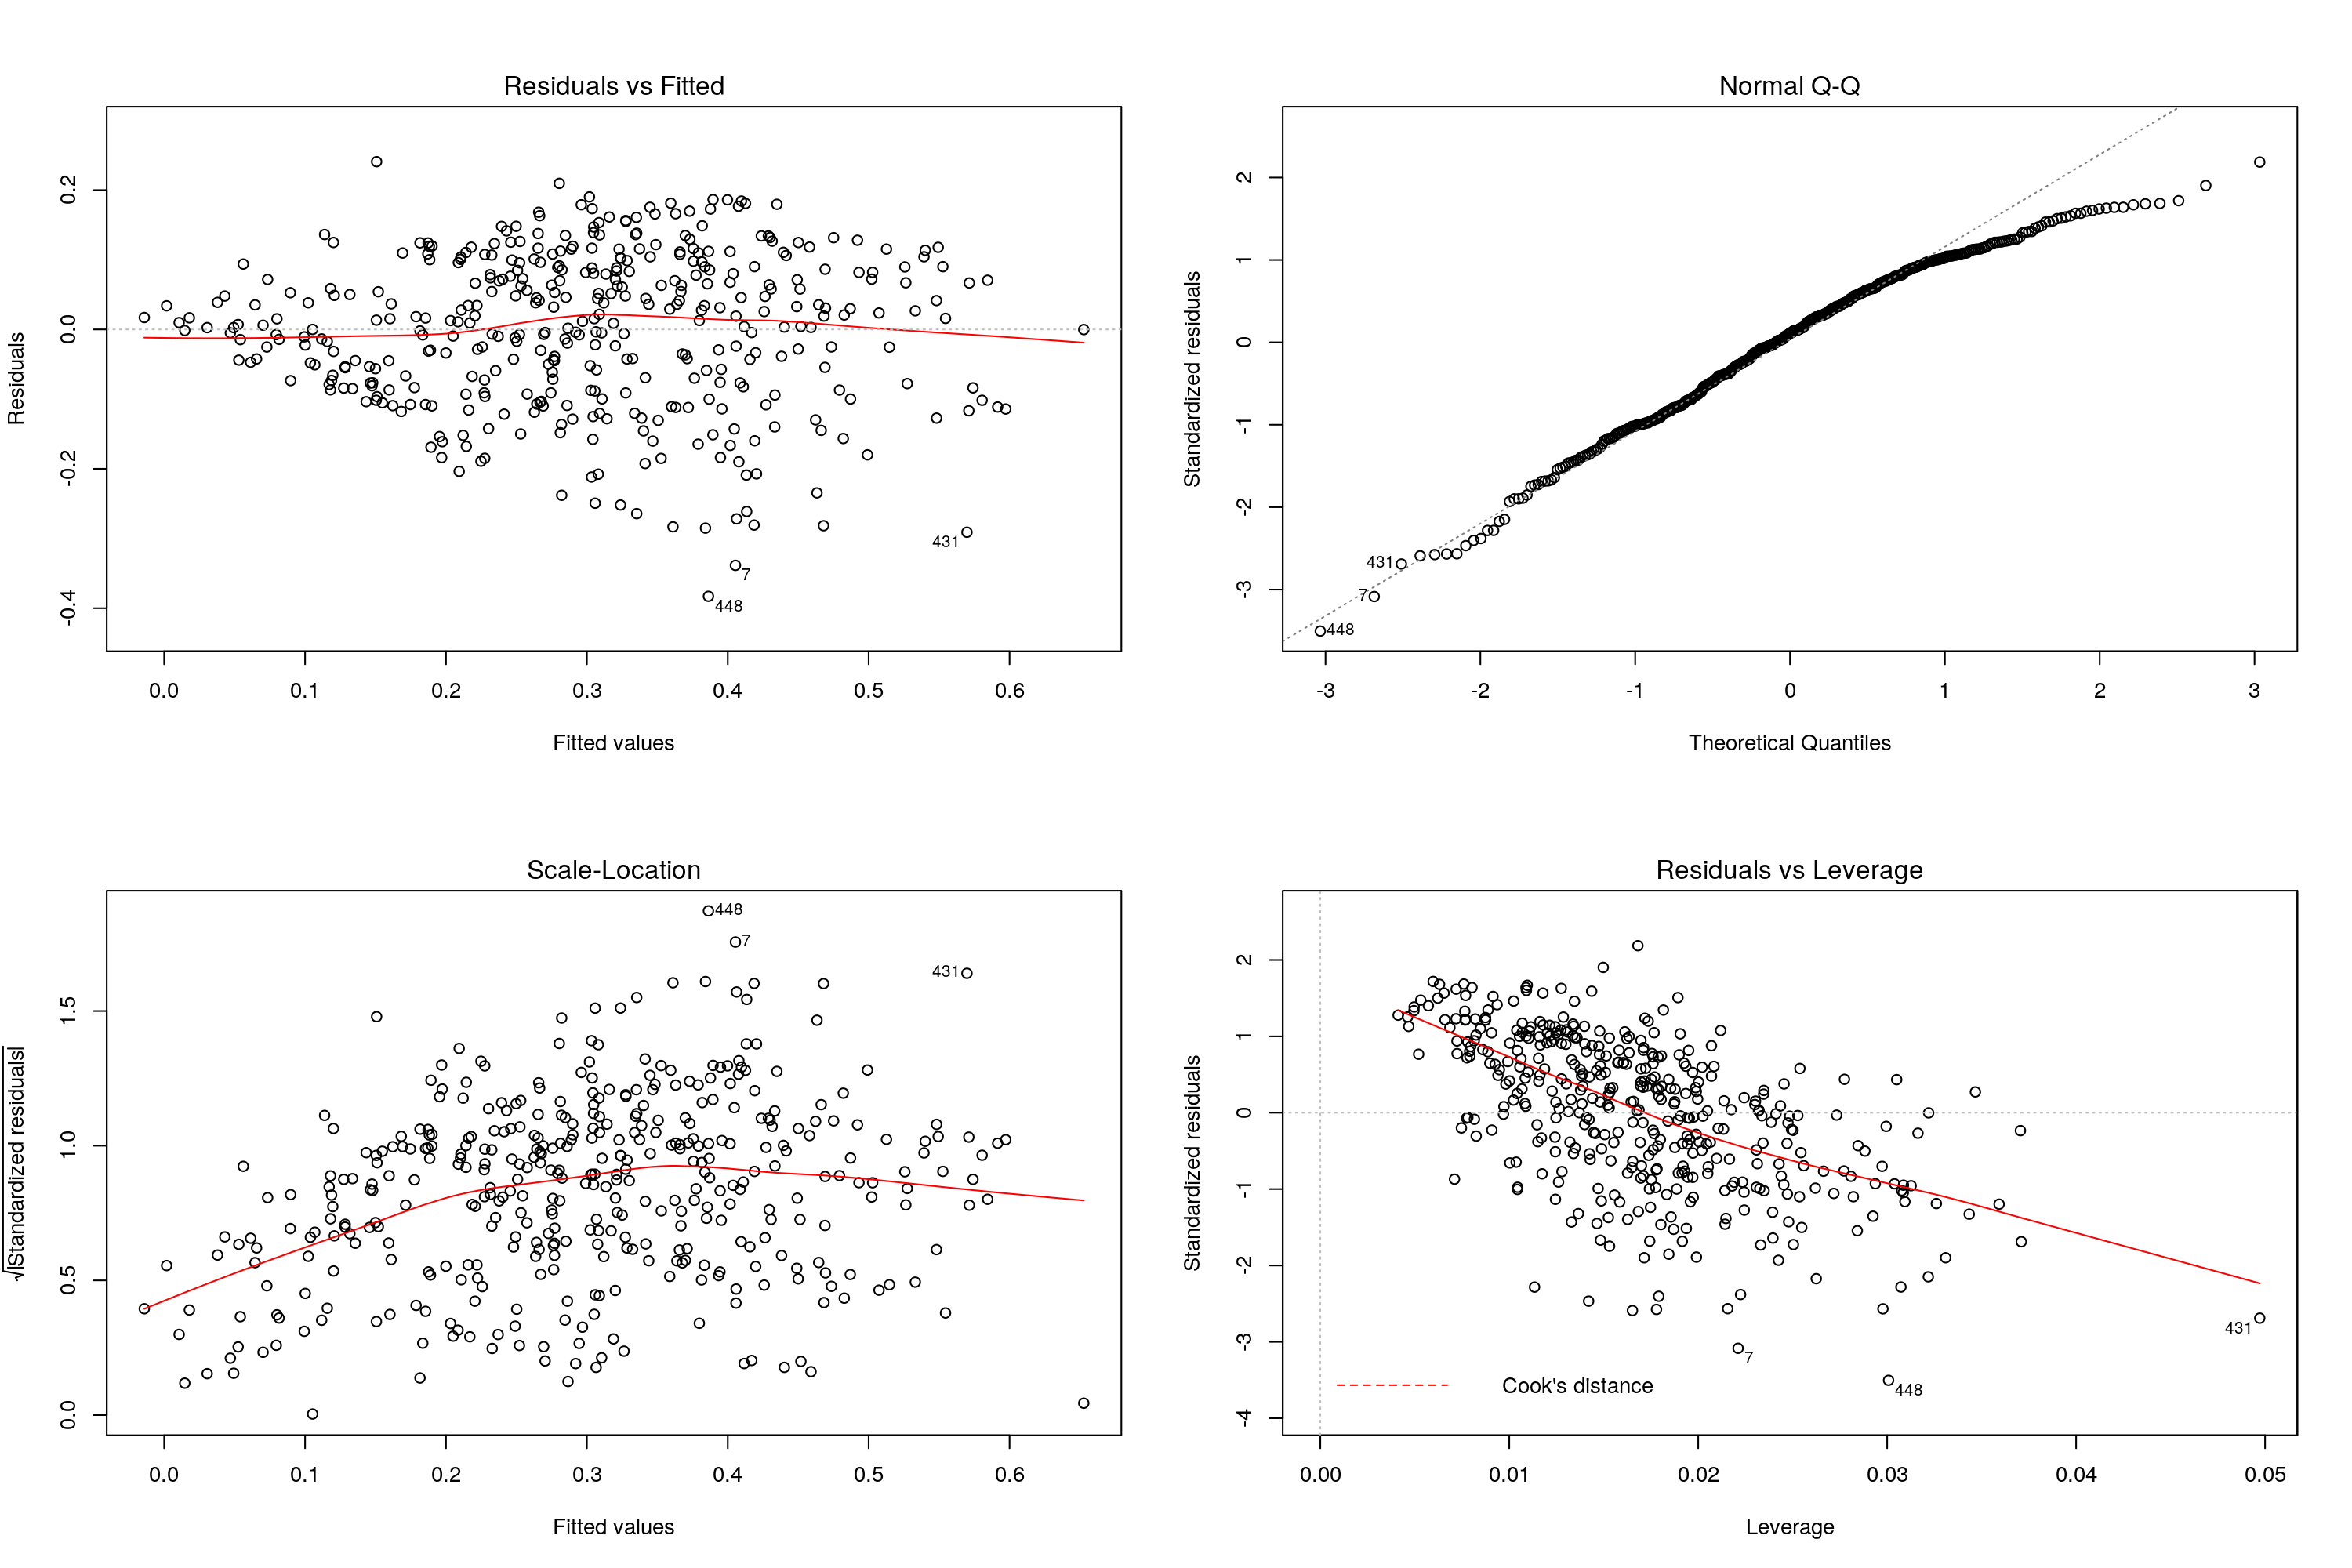

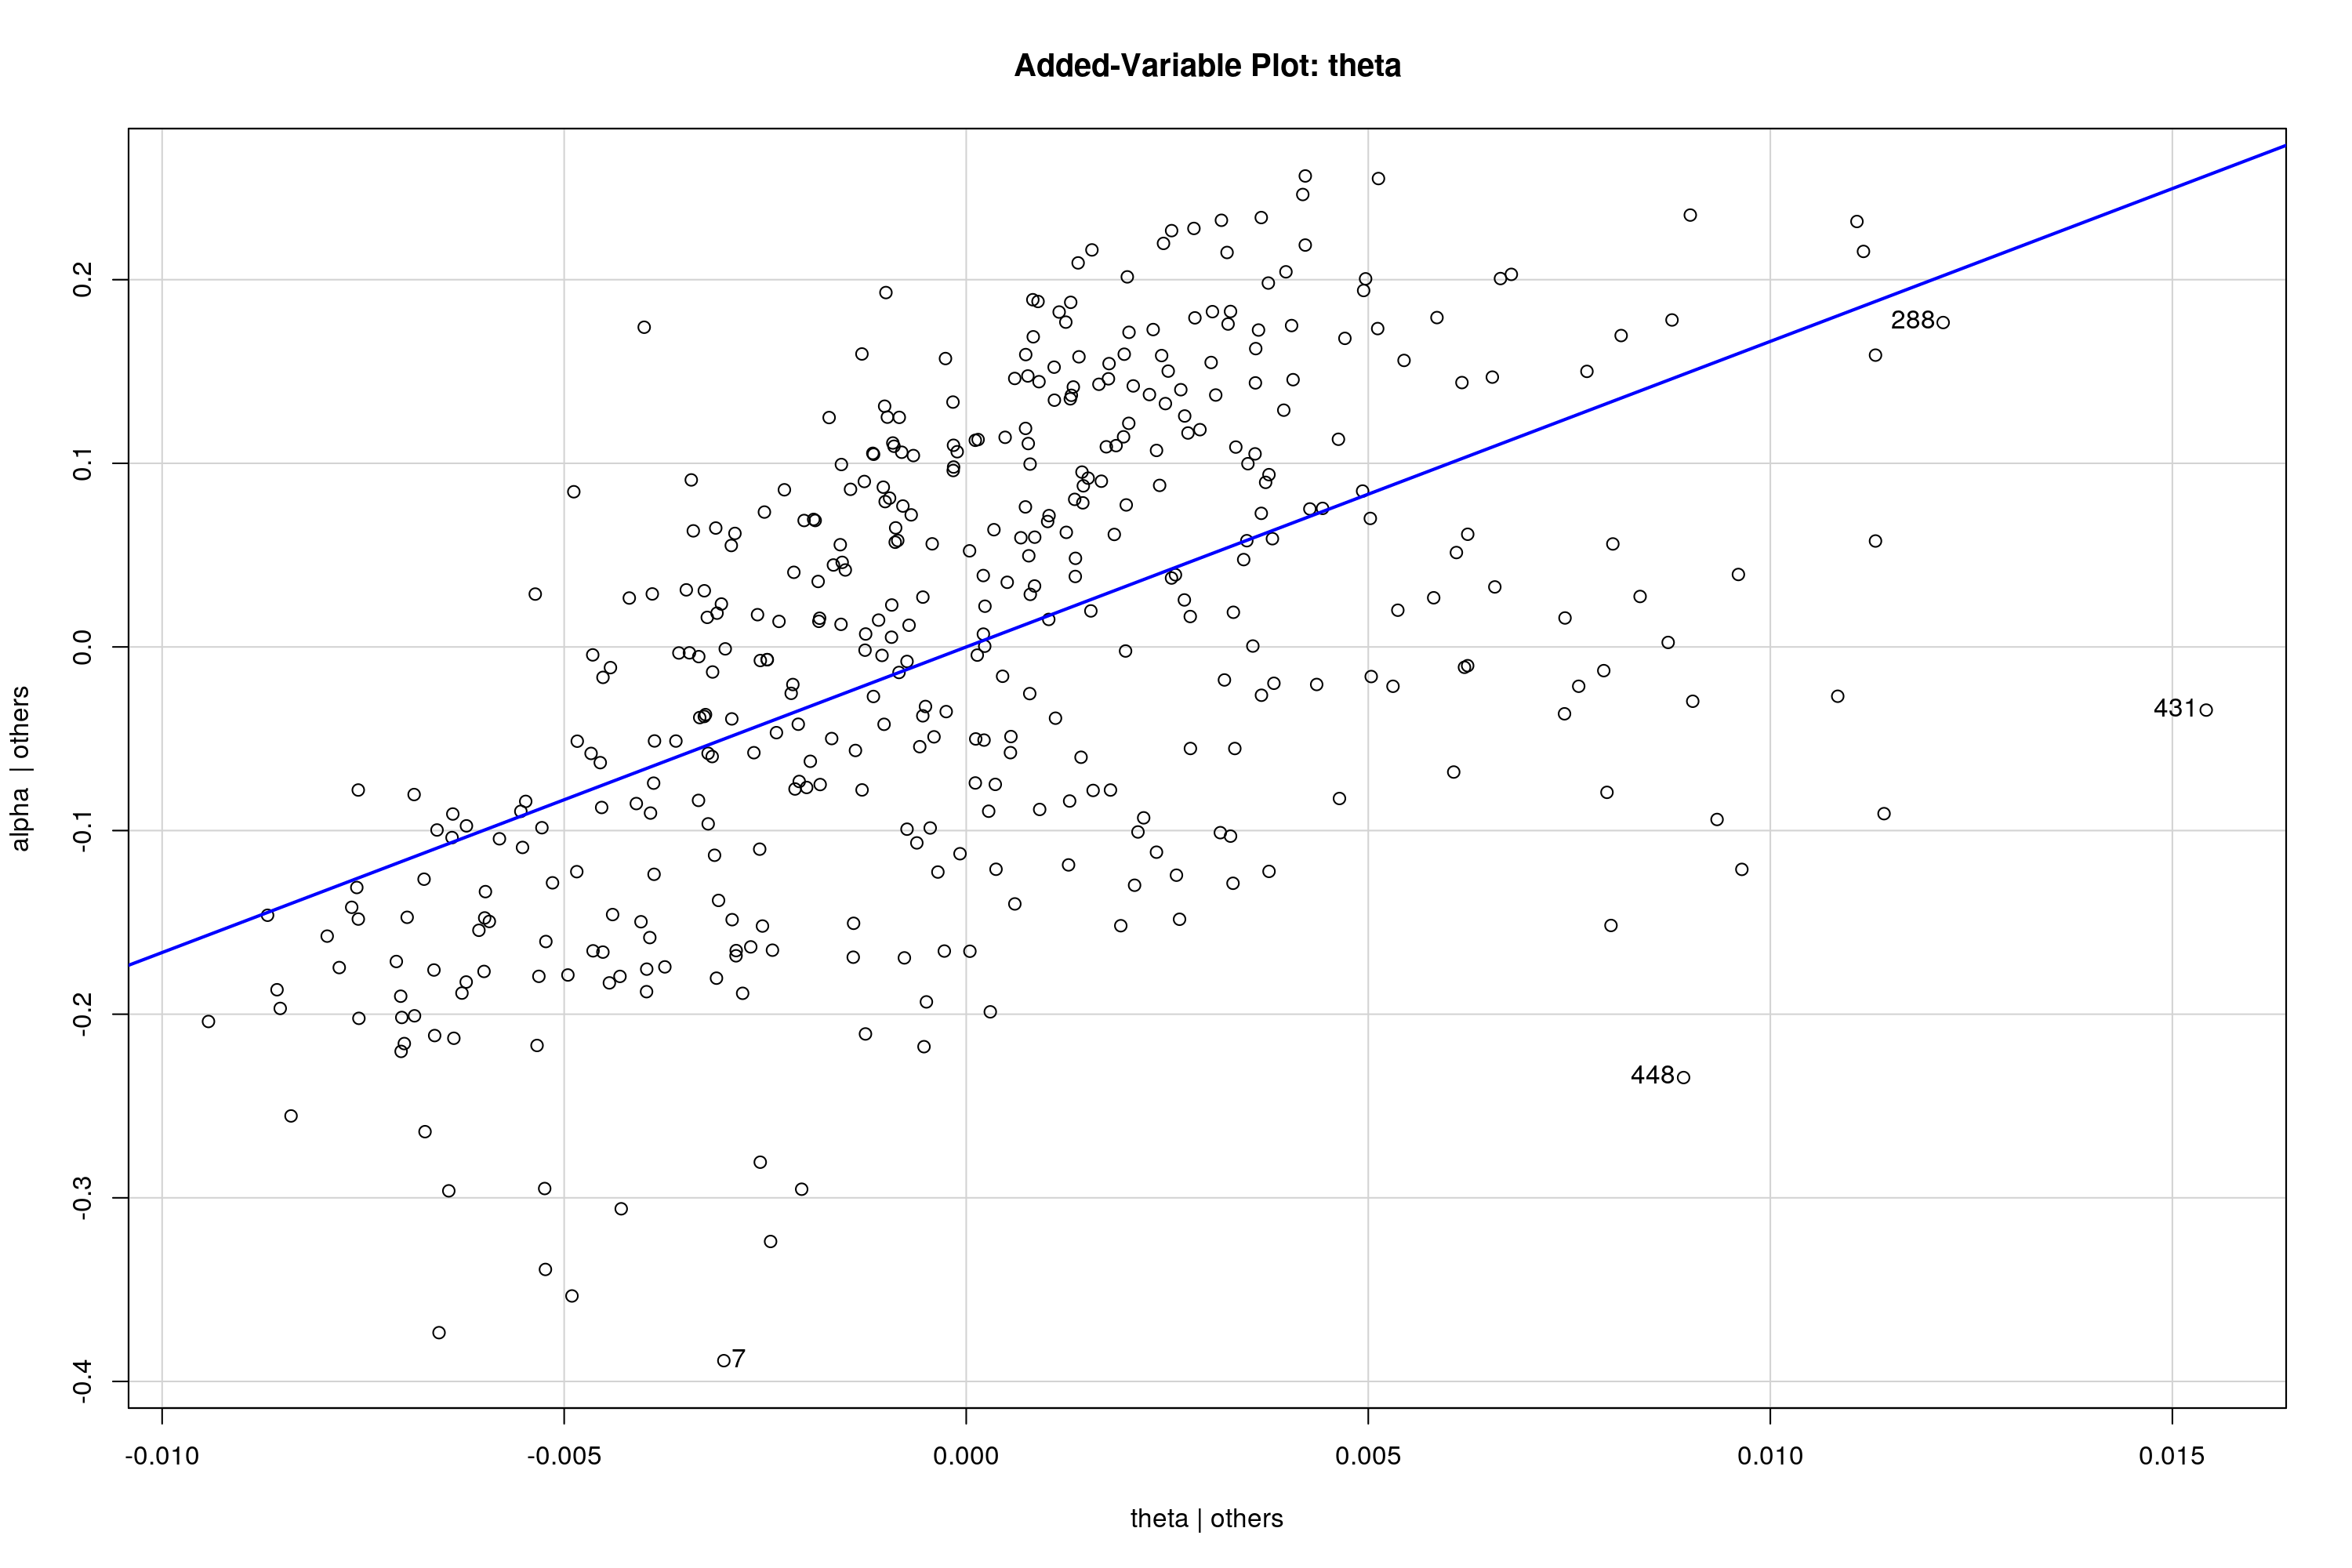

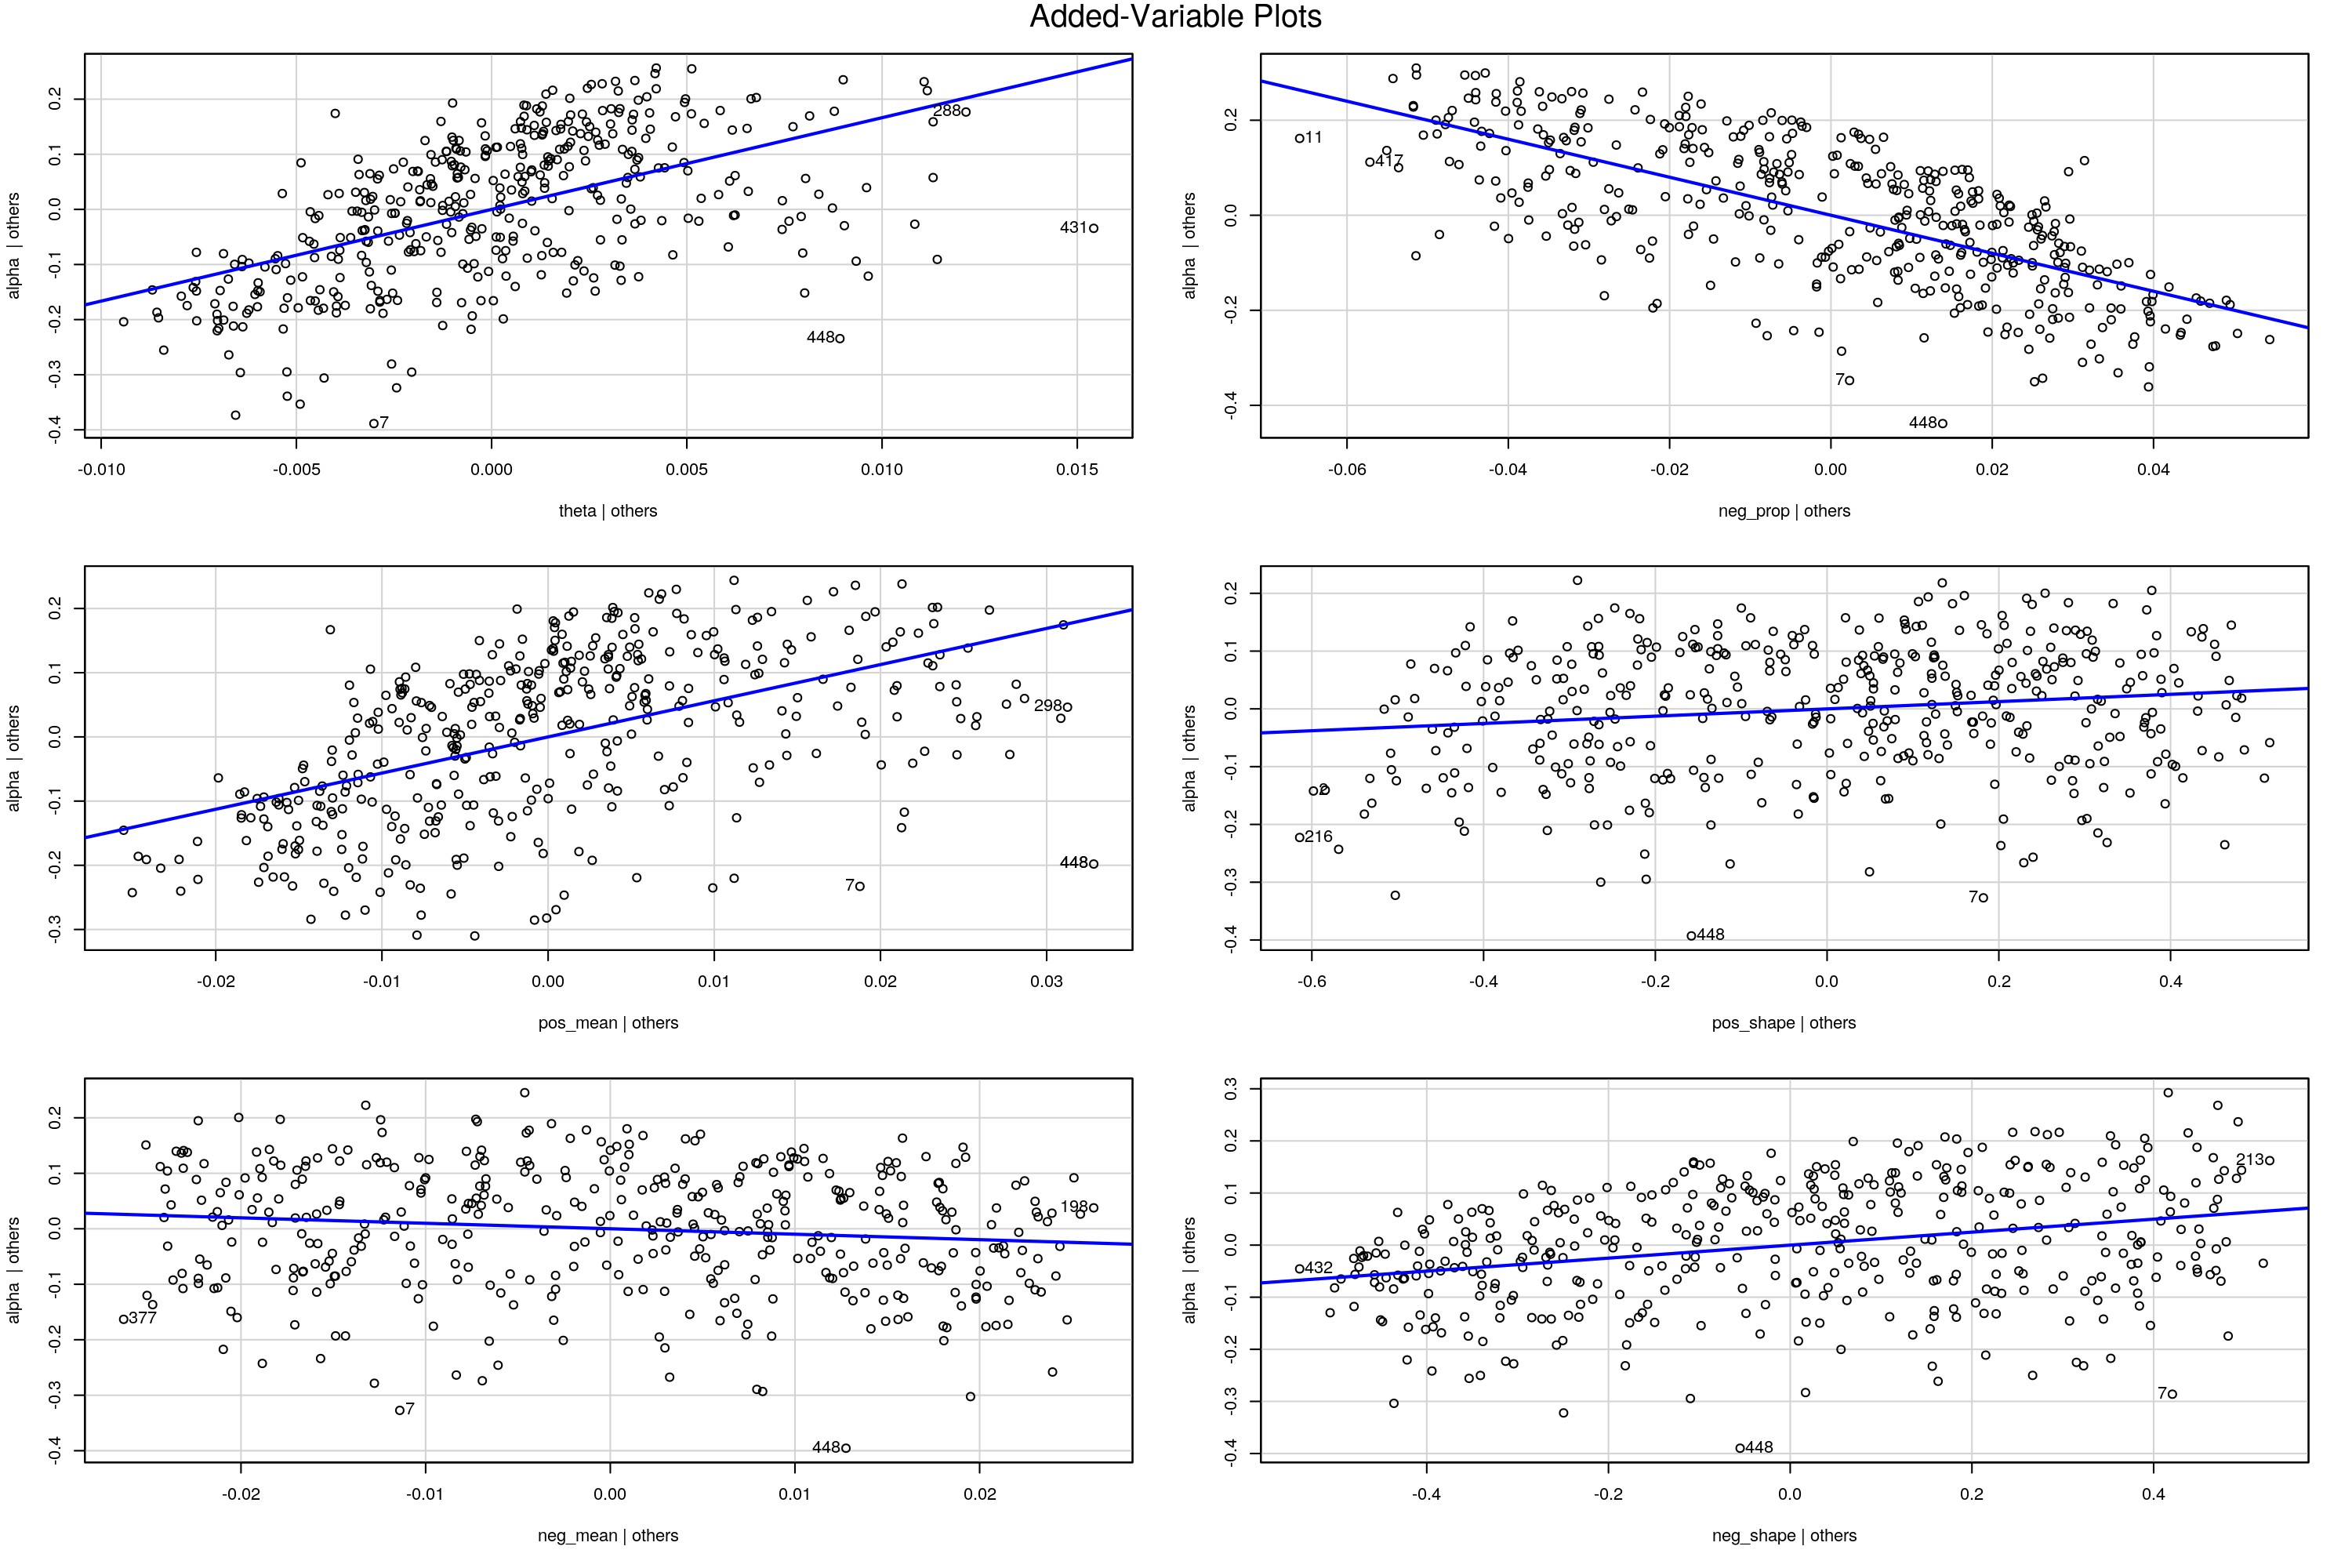

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



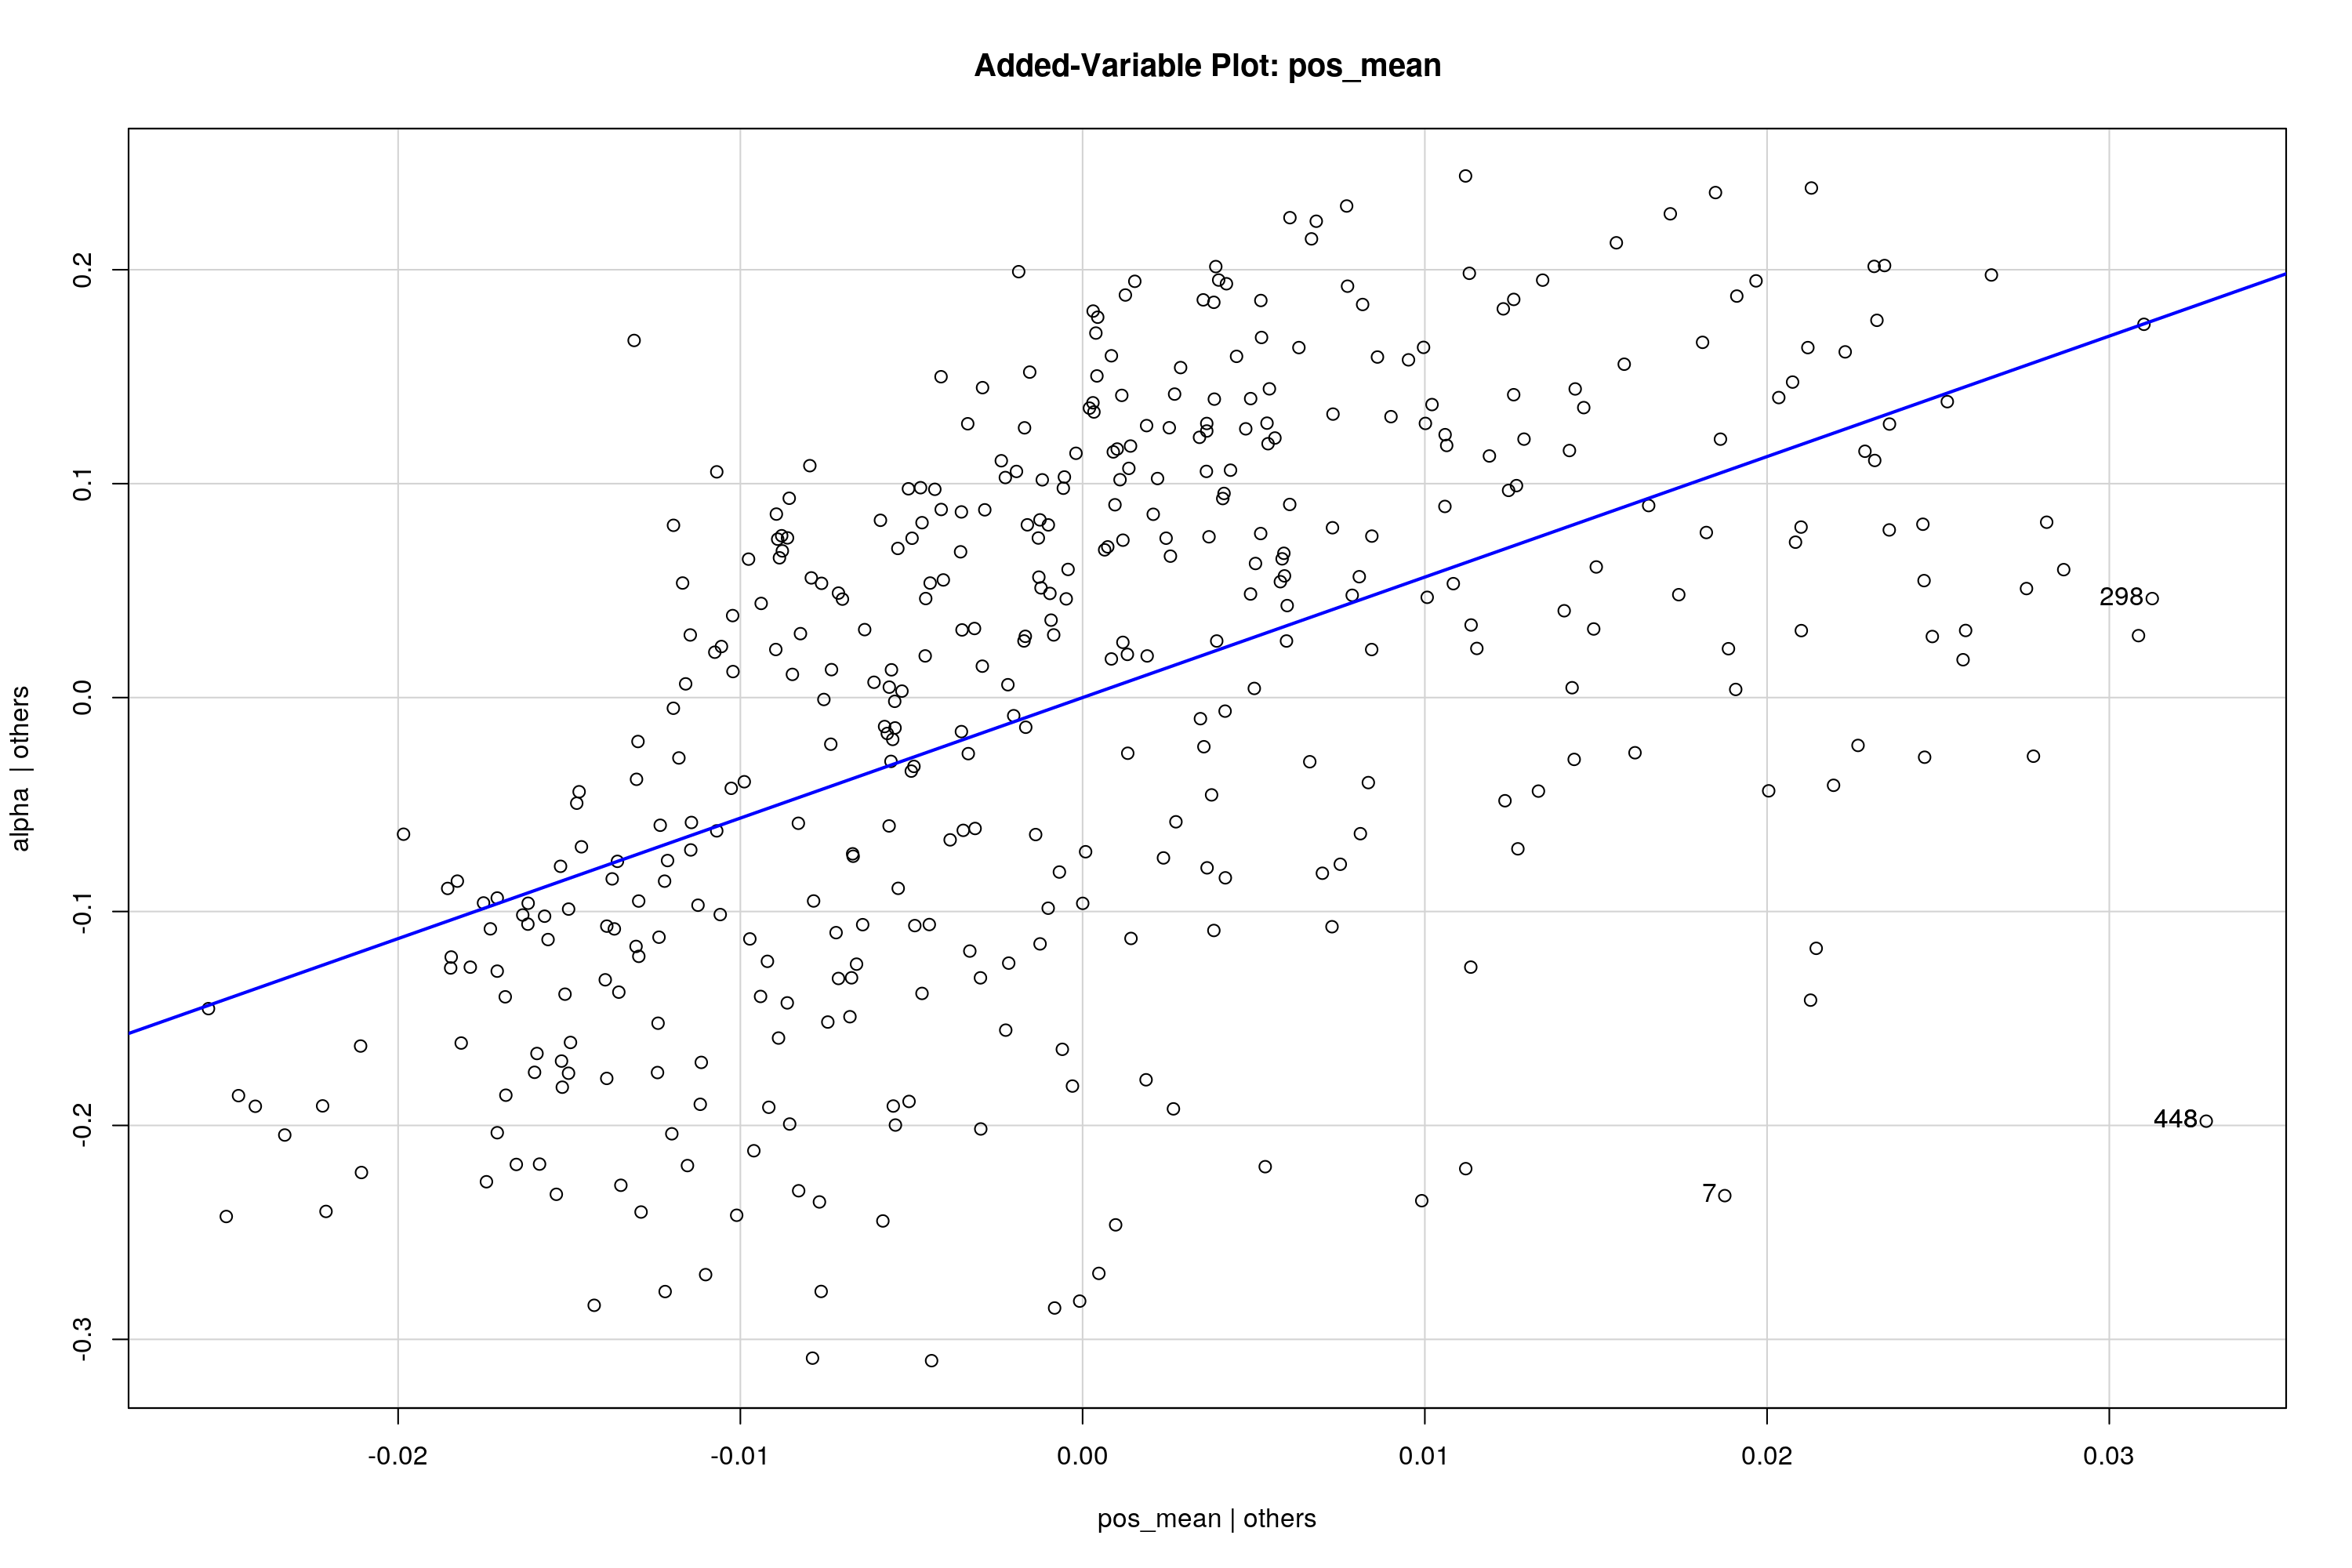

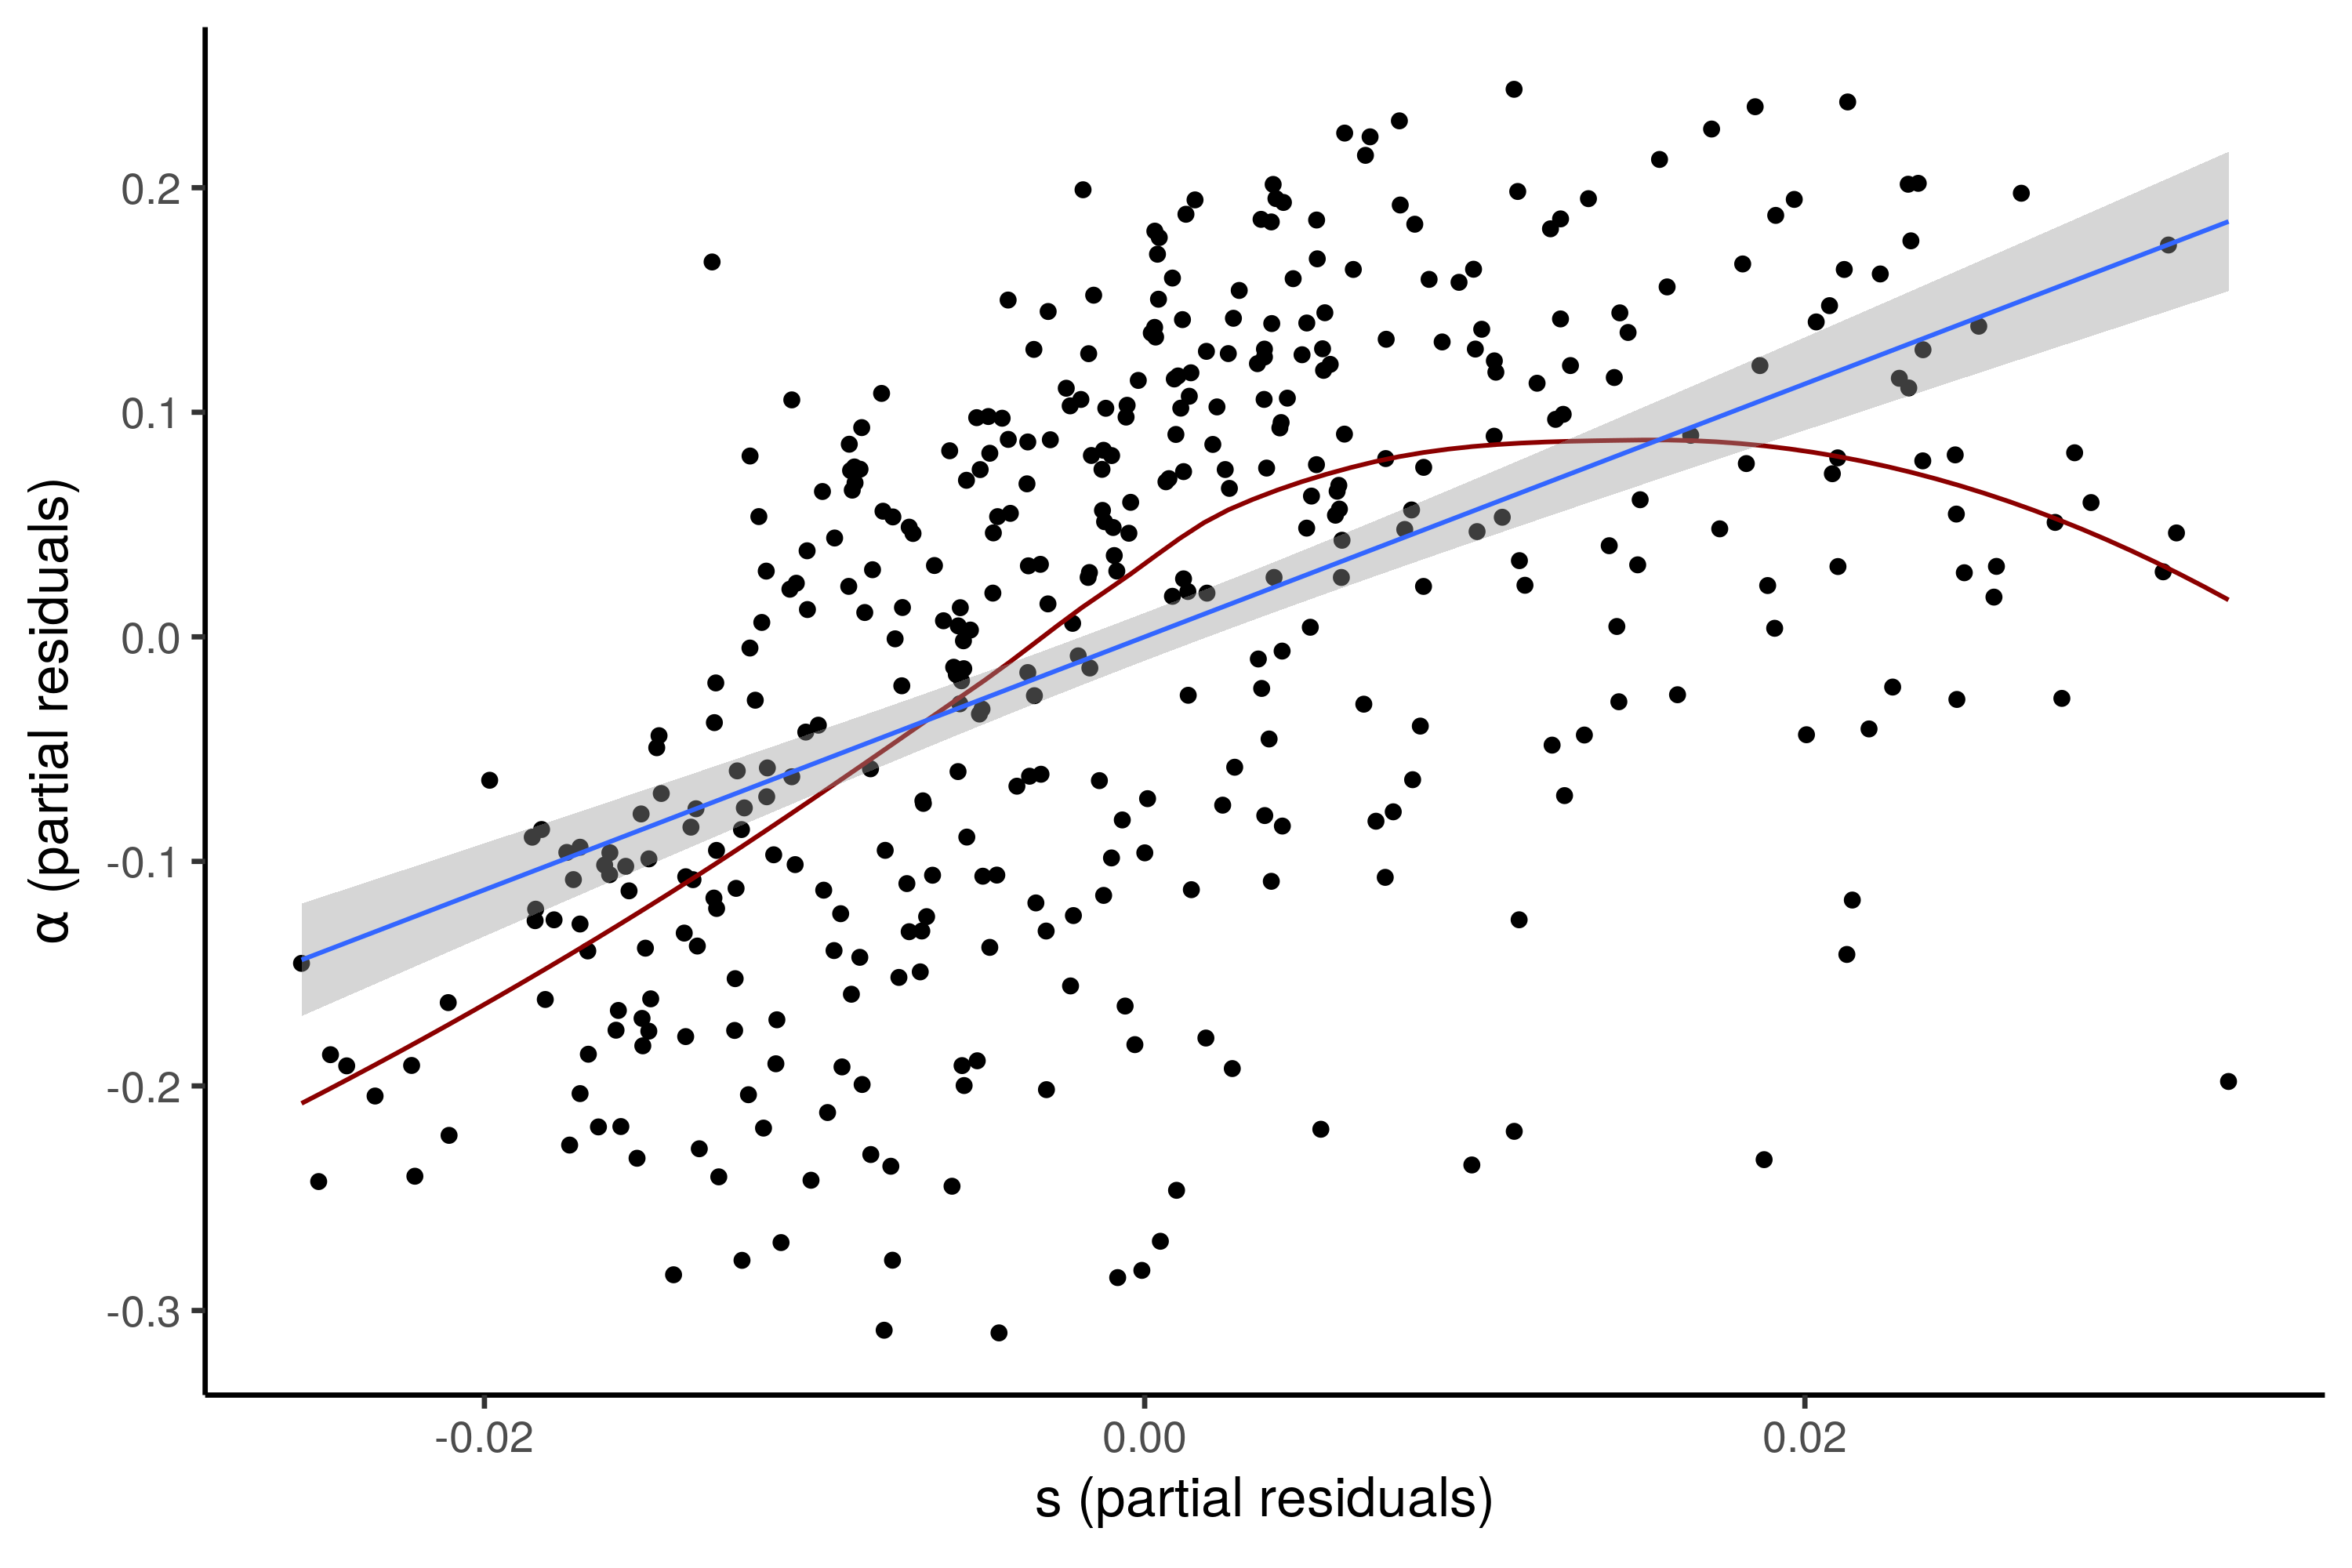

In [11]:
head(dfe_df)

dfe_model_df <- 
    dfe_df %>%
    filter(n == 20)
    #mutate(N_A = log10(N_A), N_B = log10(N_B), N_0 = log10(N_0))


mod_alpha <- 
dfe_model_df %>% 
    lm(alpha ~ theta  + neg_prop + pos_mean + pos_shape + neg_mean + neg_shape, data = .)

par(mfrow = c(2,2))
plot(mod_alpha)
par(mfrow = c(1,1))

mod_alpha %>% 
    summary() %>% 
    xtable::xtable(digits = 3, display = c("s", "f", "f", "f", "g")) %>% 
    print()


theta_av <- car::avPlot(mod_alpha, "theta")

theta_avplot <- 
theta_av %>% 
    data.frame() %>% 
    ggplot(aes(theta,alpha)) +
    geom_point(size = 3) +
    geom_smooth(se = F, colour = "darkred") +
    geom_smooth(method = "lm") +
    xlab(expression(paste(theta, " (partial residuals)"))) +
    ylab(expression(paste(alpha, " (partial residuals)")))
 

car::avPlots(mod_alpha)



theta_av <- car::avPlot(mod_alpha, "pos_mean")

theta_av %>% 
    data.frame() %>% 
    ggplot(aes(pos_mean, alpha)) +
    geom_point(size = 3) +
    geom_smooth(se = F, colour = "darkred") +
    geom_smooth(method = "lm") +
    xlab(expression(paste(s, " (partial residuals)"))) +
    ylab(expression(paste(alpha, " (partial residuals)")))
 


% latex table generated in R 3.6.3 by xtable 1.8-4 package
% Mon Jun 14 19:55:30 2021
\begin{table}[ht]
\centering
\begin{tabular}{rrrrr}
  \hline
 & Estimate & Std. Error & t value & Pr($>$$|$t$|$) \\ 
  \hline
(Intercept) & 13.311 & 0.918 & 14.493 & 1.13e-38 \\ 
  theta & 120.936 & 6.045 & 20.006 & 1.69e-62 \\ 
  neg\_prop & -11.817 & 0.972 & -12.159 & 3.14e-29 \\ 
  pos\_mean & 17.709 & 2.134 & 8.300 & 1.55e-15 \\ 
  pos\_shape & 0.246 & 0.094 & 2.613 & 0.0093 \\ 
  neg\_mean & 4.686 & 1.814 & 2.583 & 0.0102 \\ 
  neg\_shape & -0.023 & 0.091 & -0.259 & 0.796 \\ 
   \hline
\end{tabular}
\end{table}


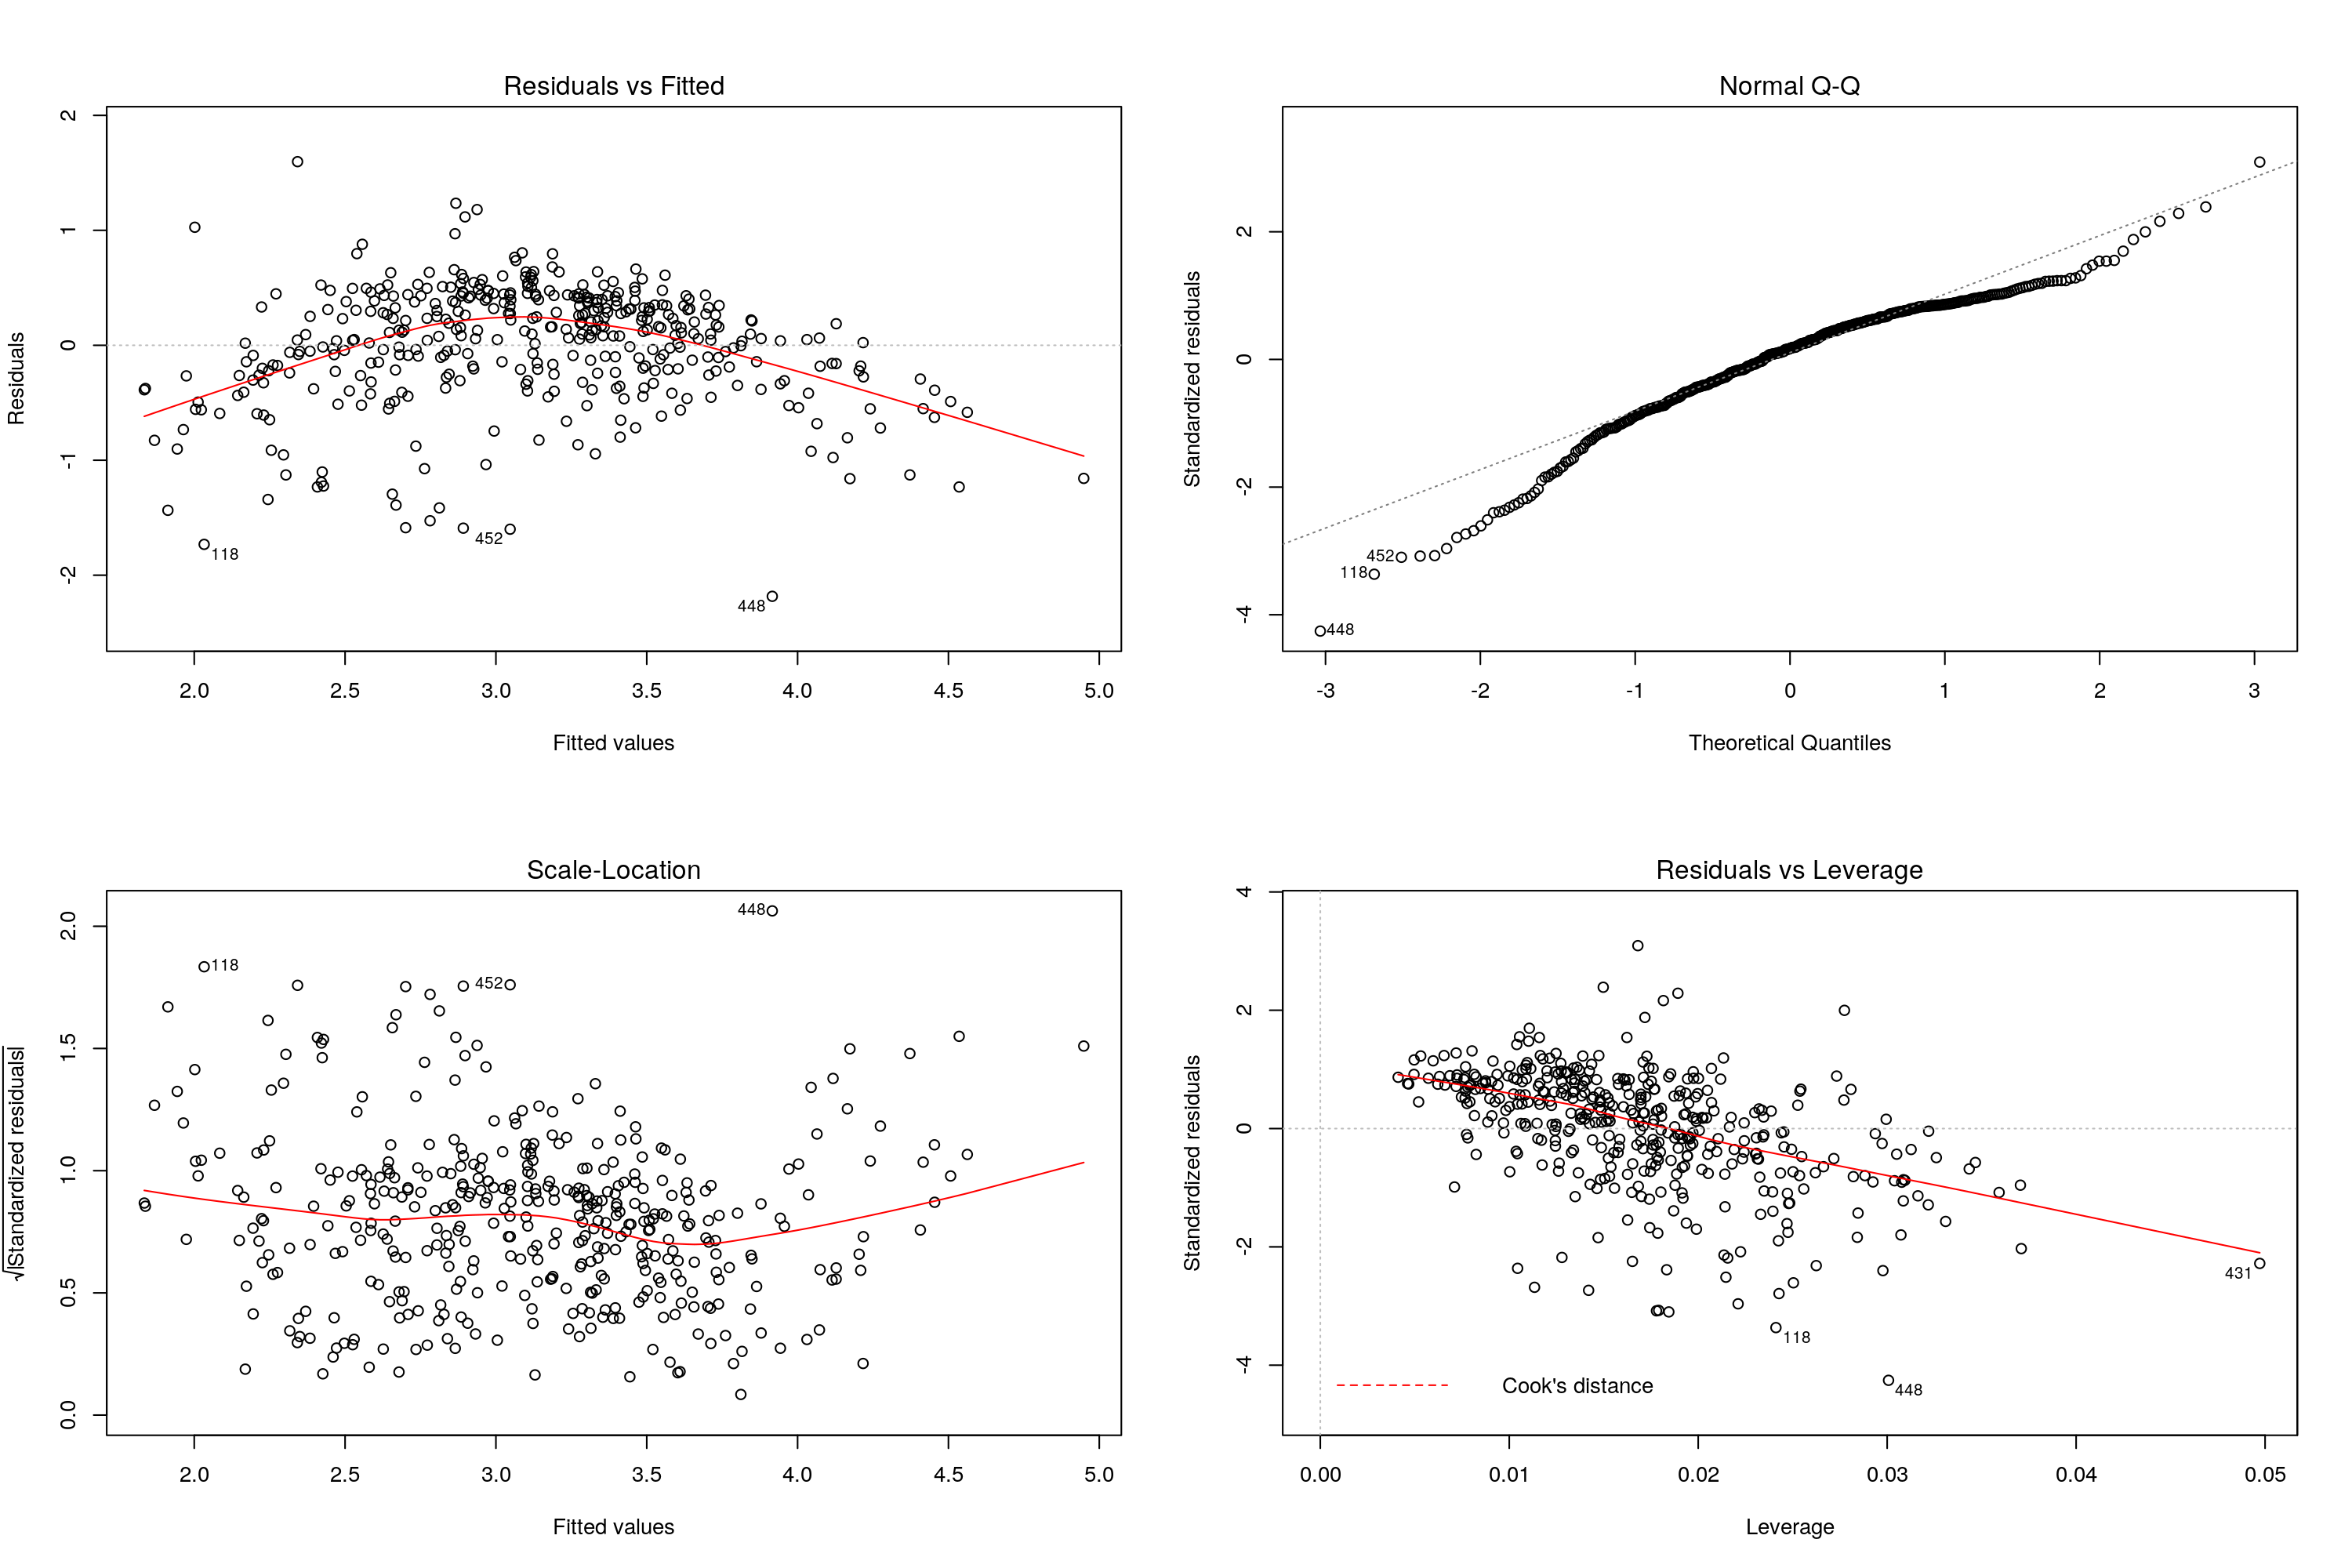

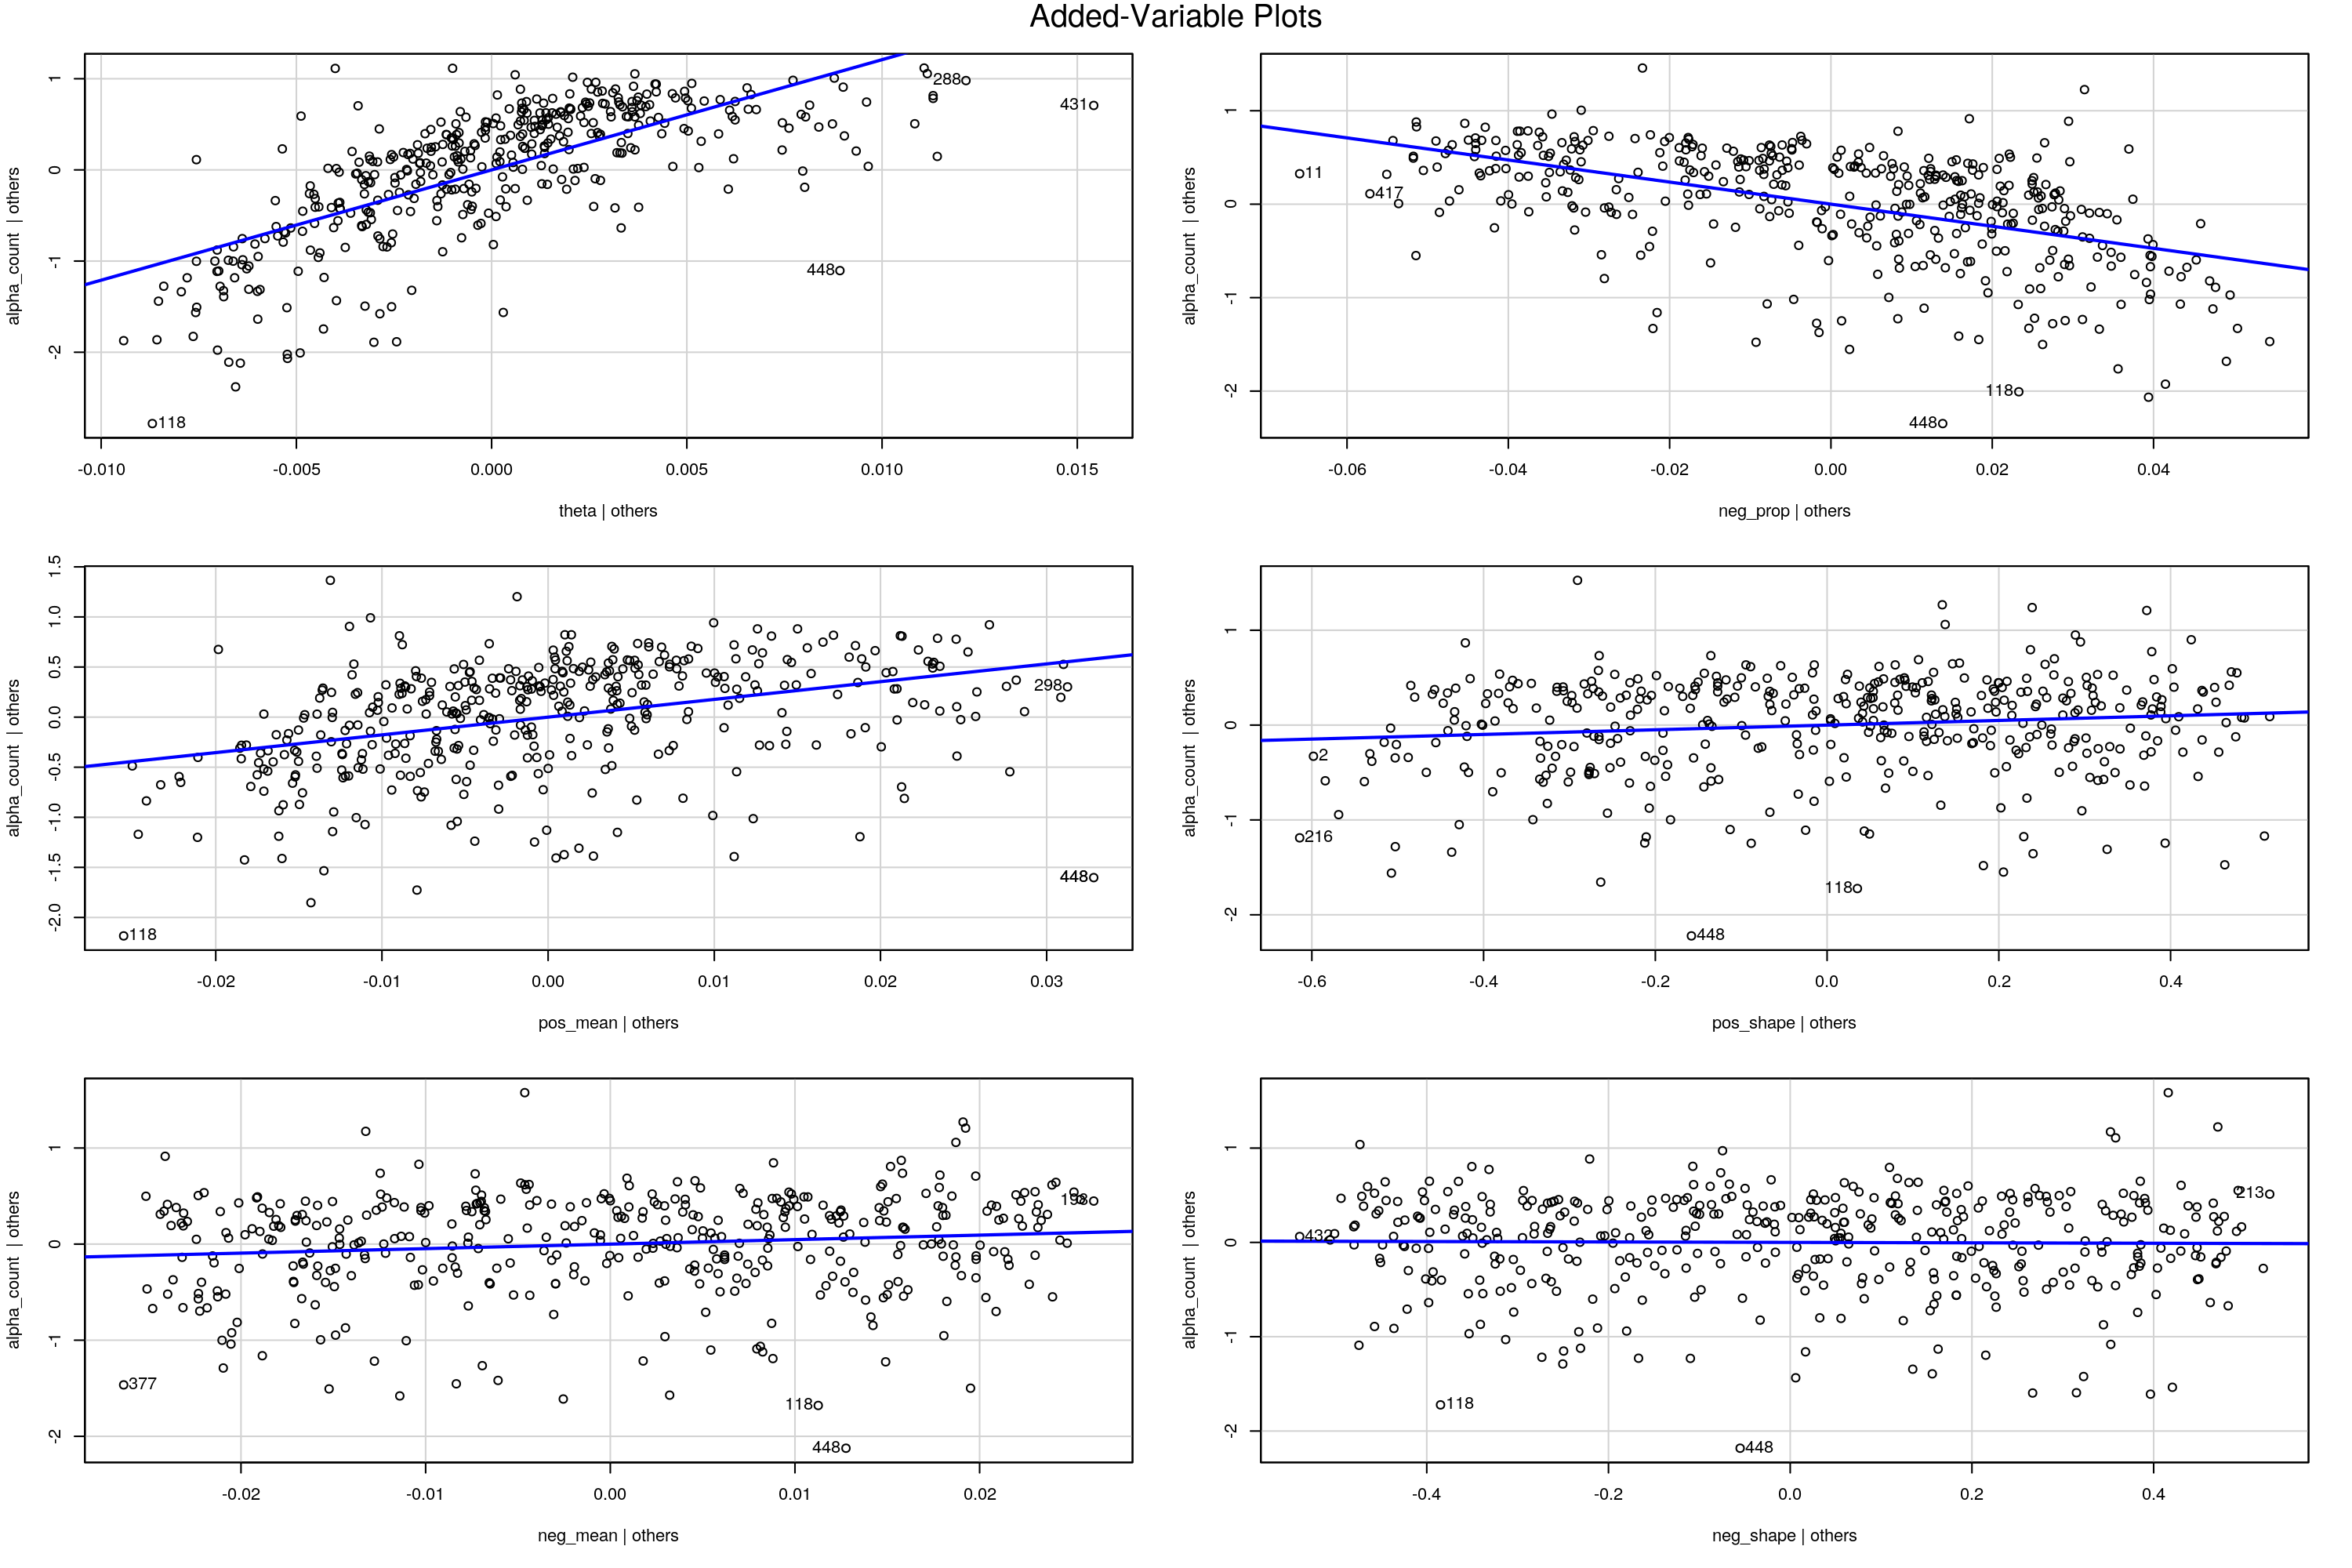

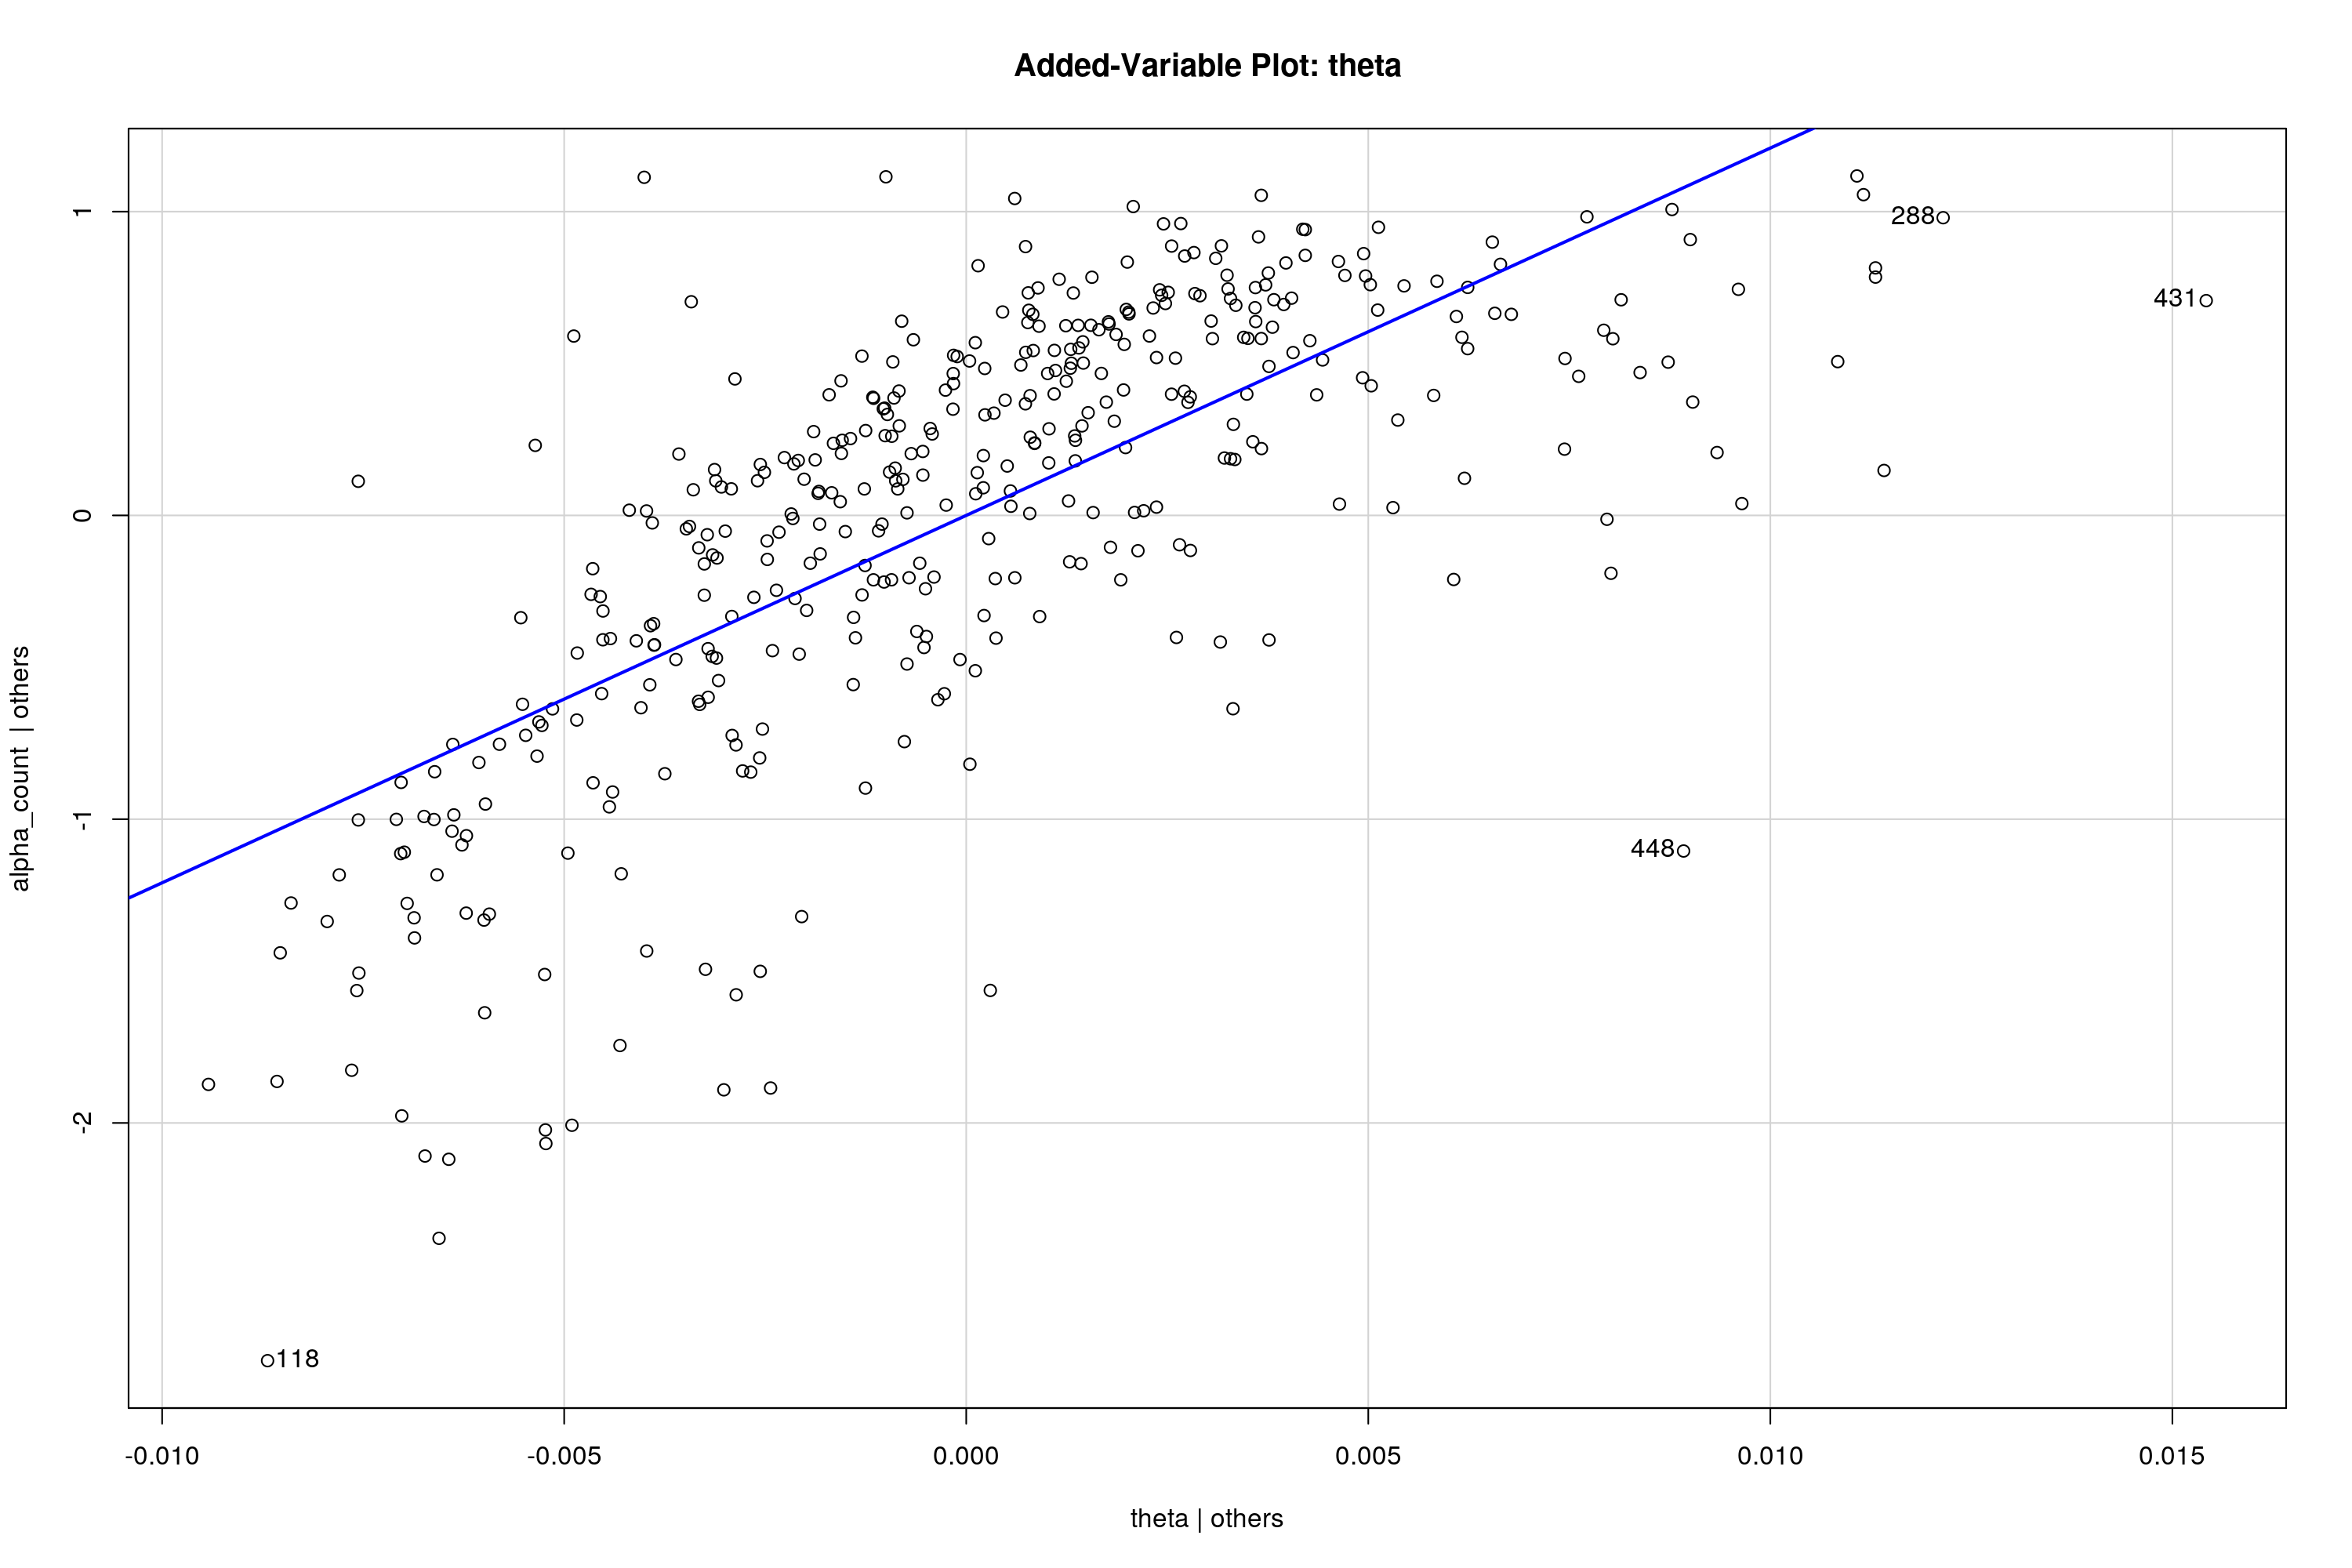

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 53 rows containing non-finite values (stat_smooth).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 53 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 53 rows containing missing values (geom_point).”
`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 53 rows containing non-finite values (stat_smooth).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 53 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 53 rows containing missing values (geom_point).”
`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



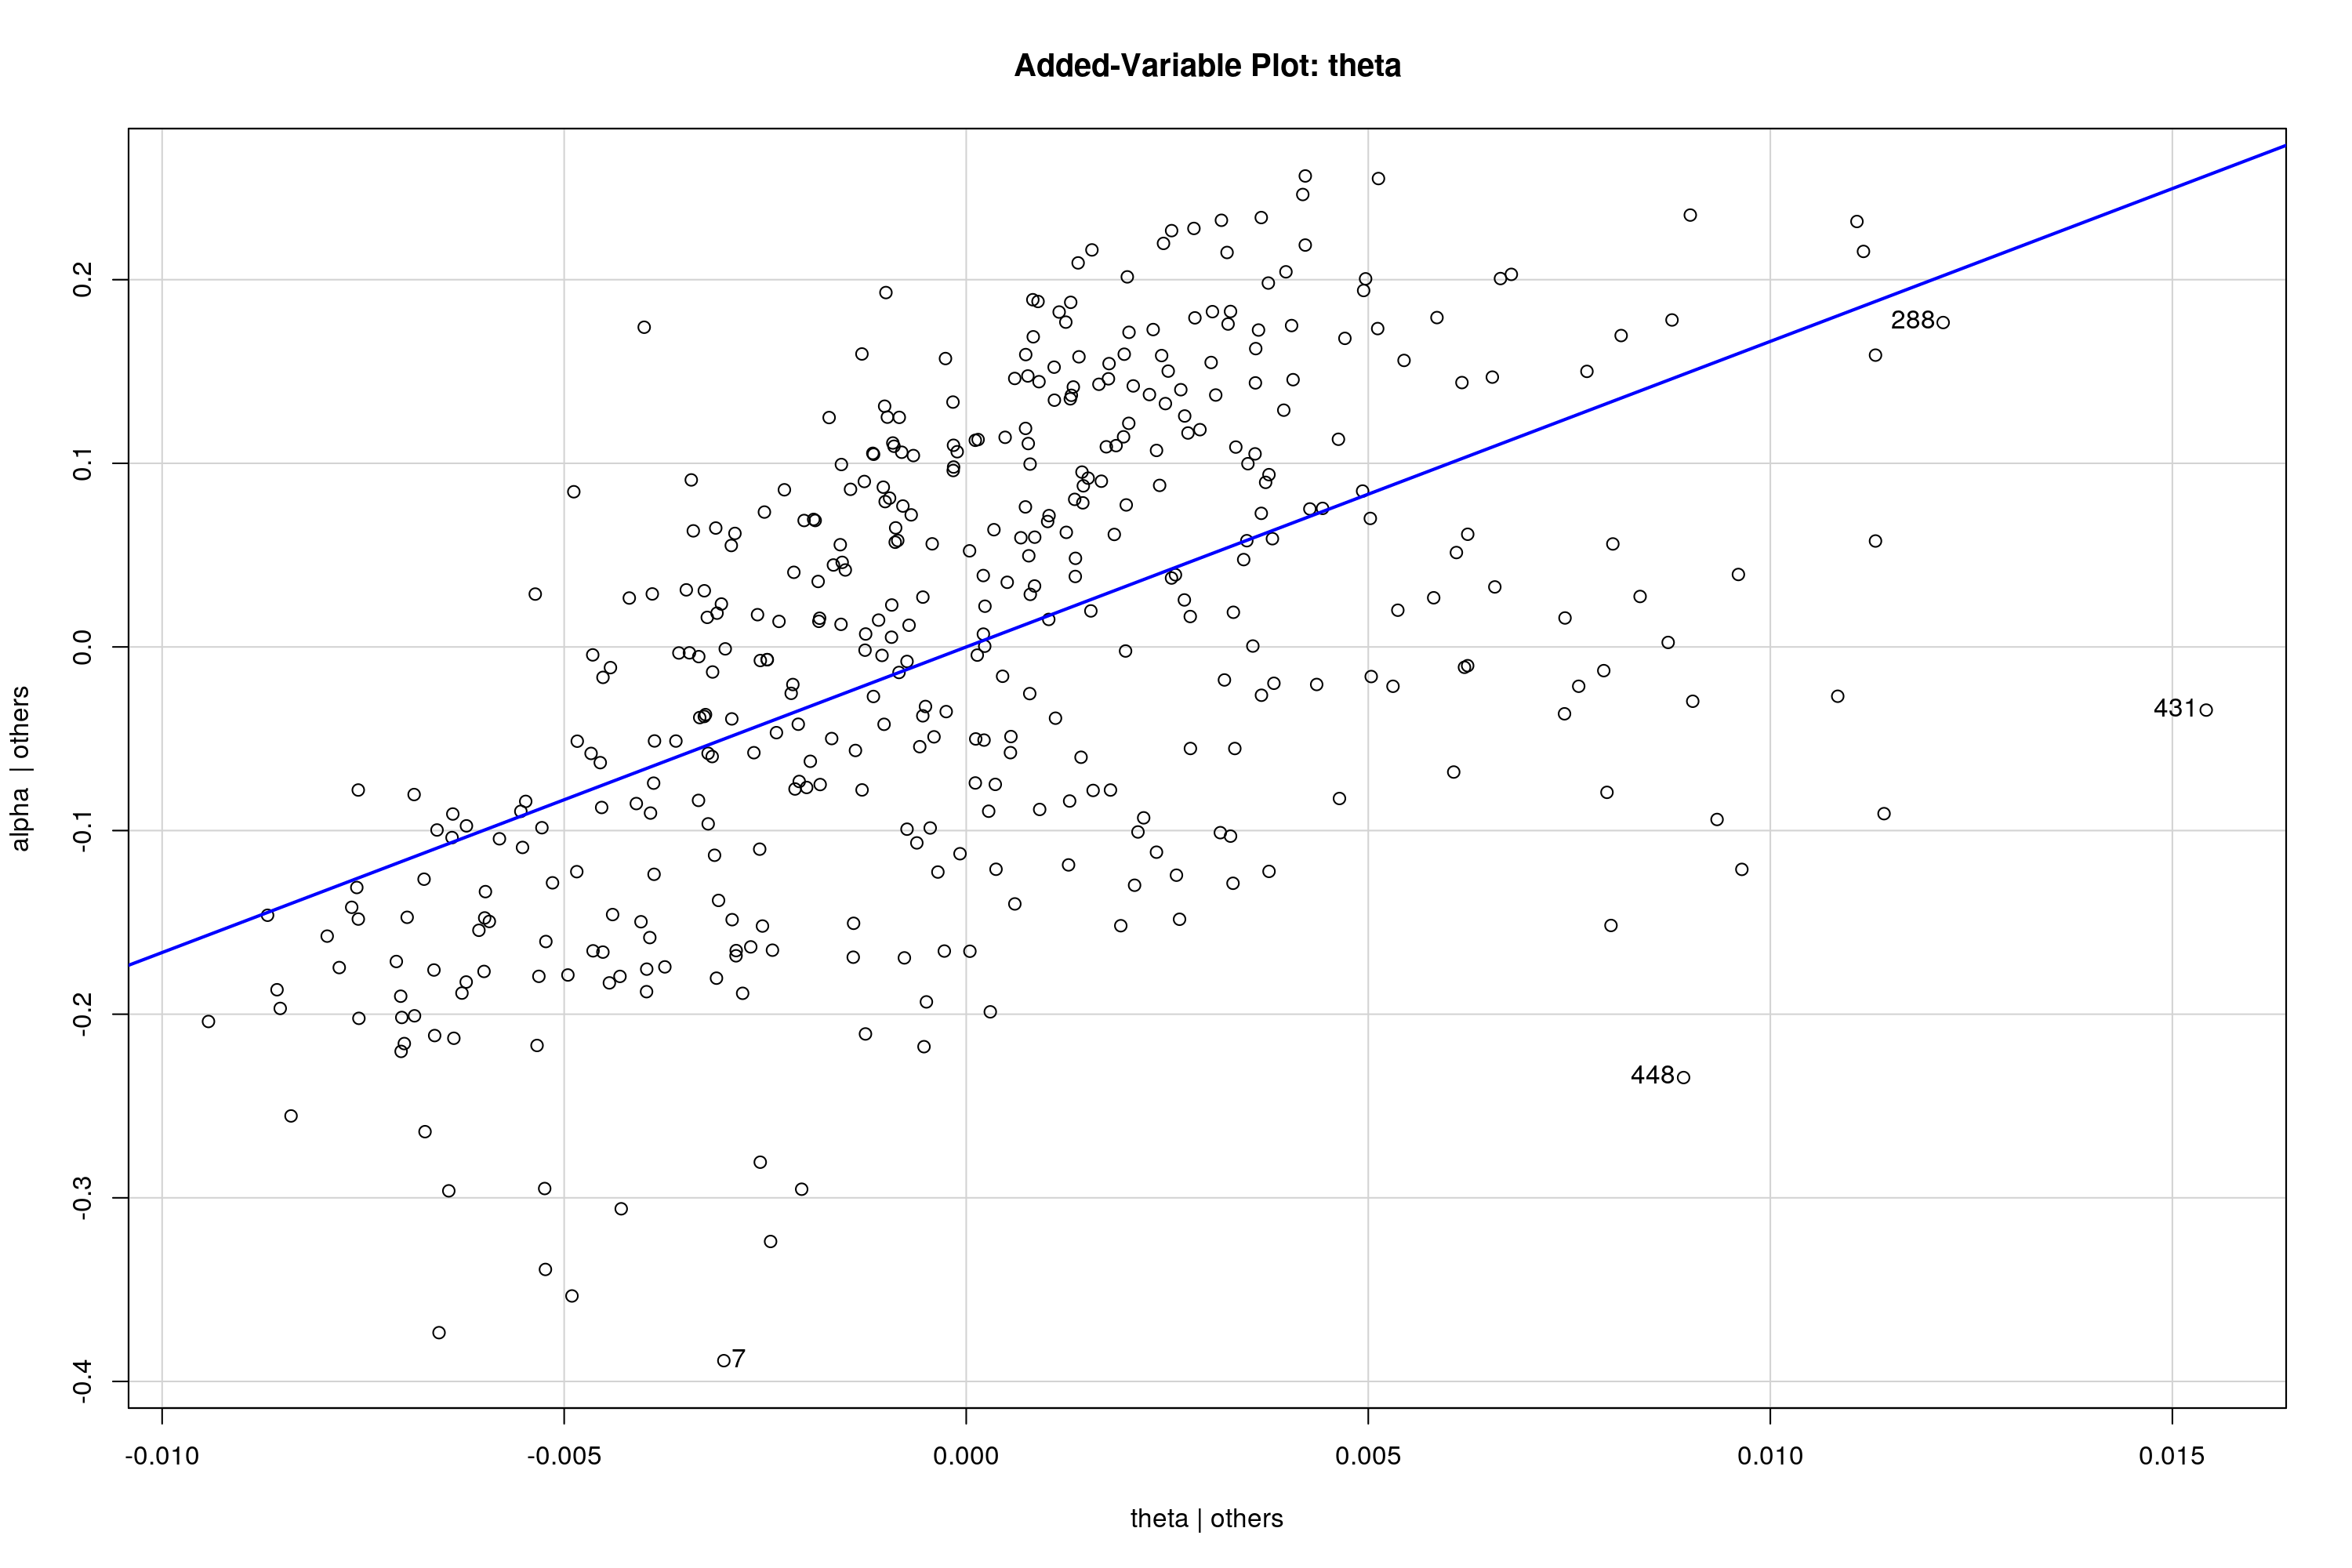

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 53 rows containing non-finite values (stat_smooth).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 53 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 53 rows containing missing values (geom_point).”
`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 53 rows containing non-finite values (stat_smooth).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 53 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 53 rows containing missing values (geom_point).”
`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



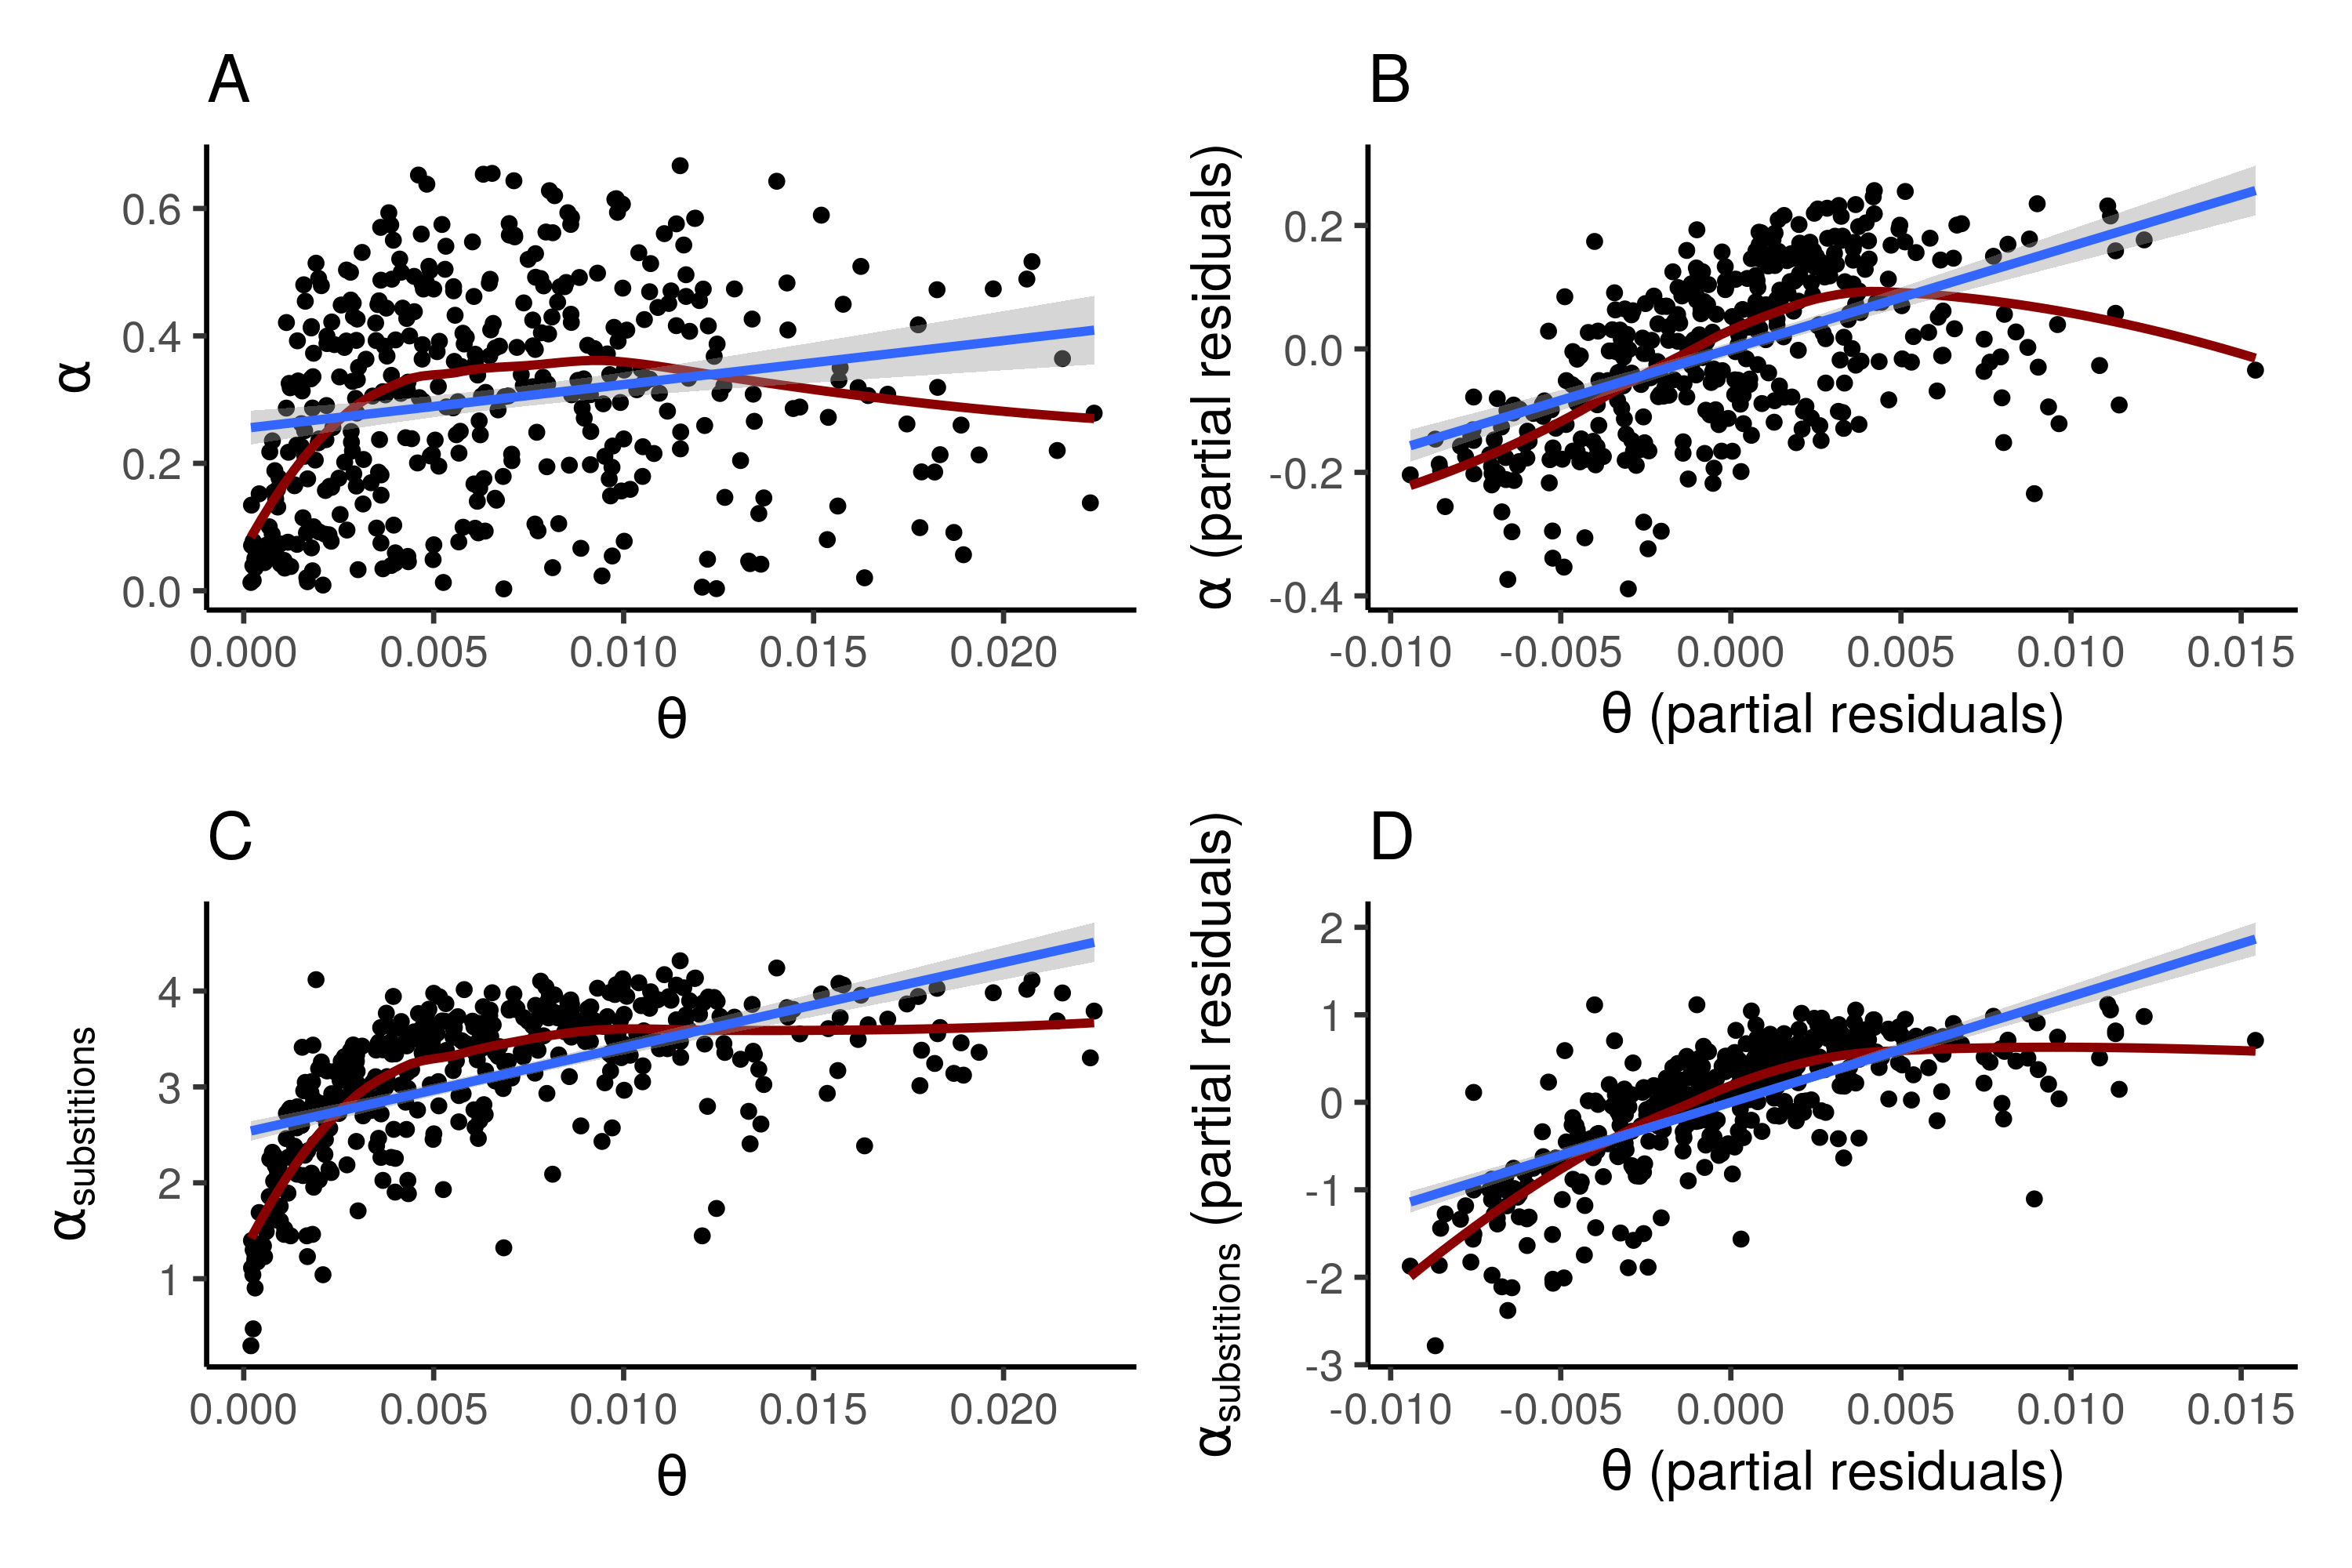

In [23]:

mod_count <- 
dfe_model_df %>% 
    lm(alpha_count ~ theta + neg_prop + pos_mean + pos_shape + neg_mean + neg_shape, data = .)

par(mfrow = c(2,2))
plot(mod_count)
par(mfrow = c(1,1))

mod_count %>% 
    summary() %>% 
    xtable::xtable(digits = 3, display = c("s", "f", "f", "f", "g")) %>% 
    print()

car::avPlots(mod_count)

count_av <- car::avPlot(mod_count, "theta")


theta_av <- car::avPlot(mod_alpha, "theta")


`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 53 rows containing non-finite values (stat_smooth).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 53 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 53 rows containing missing values (geom_point).”
`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 53 rows containing non-finite values (stat_smooth).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 53 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 53 rows containing missing values (geom_point).”
`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 53 rows containing non-finite values (stat_smooth).”

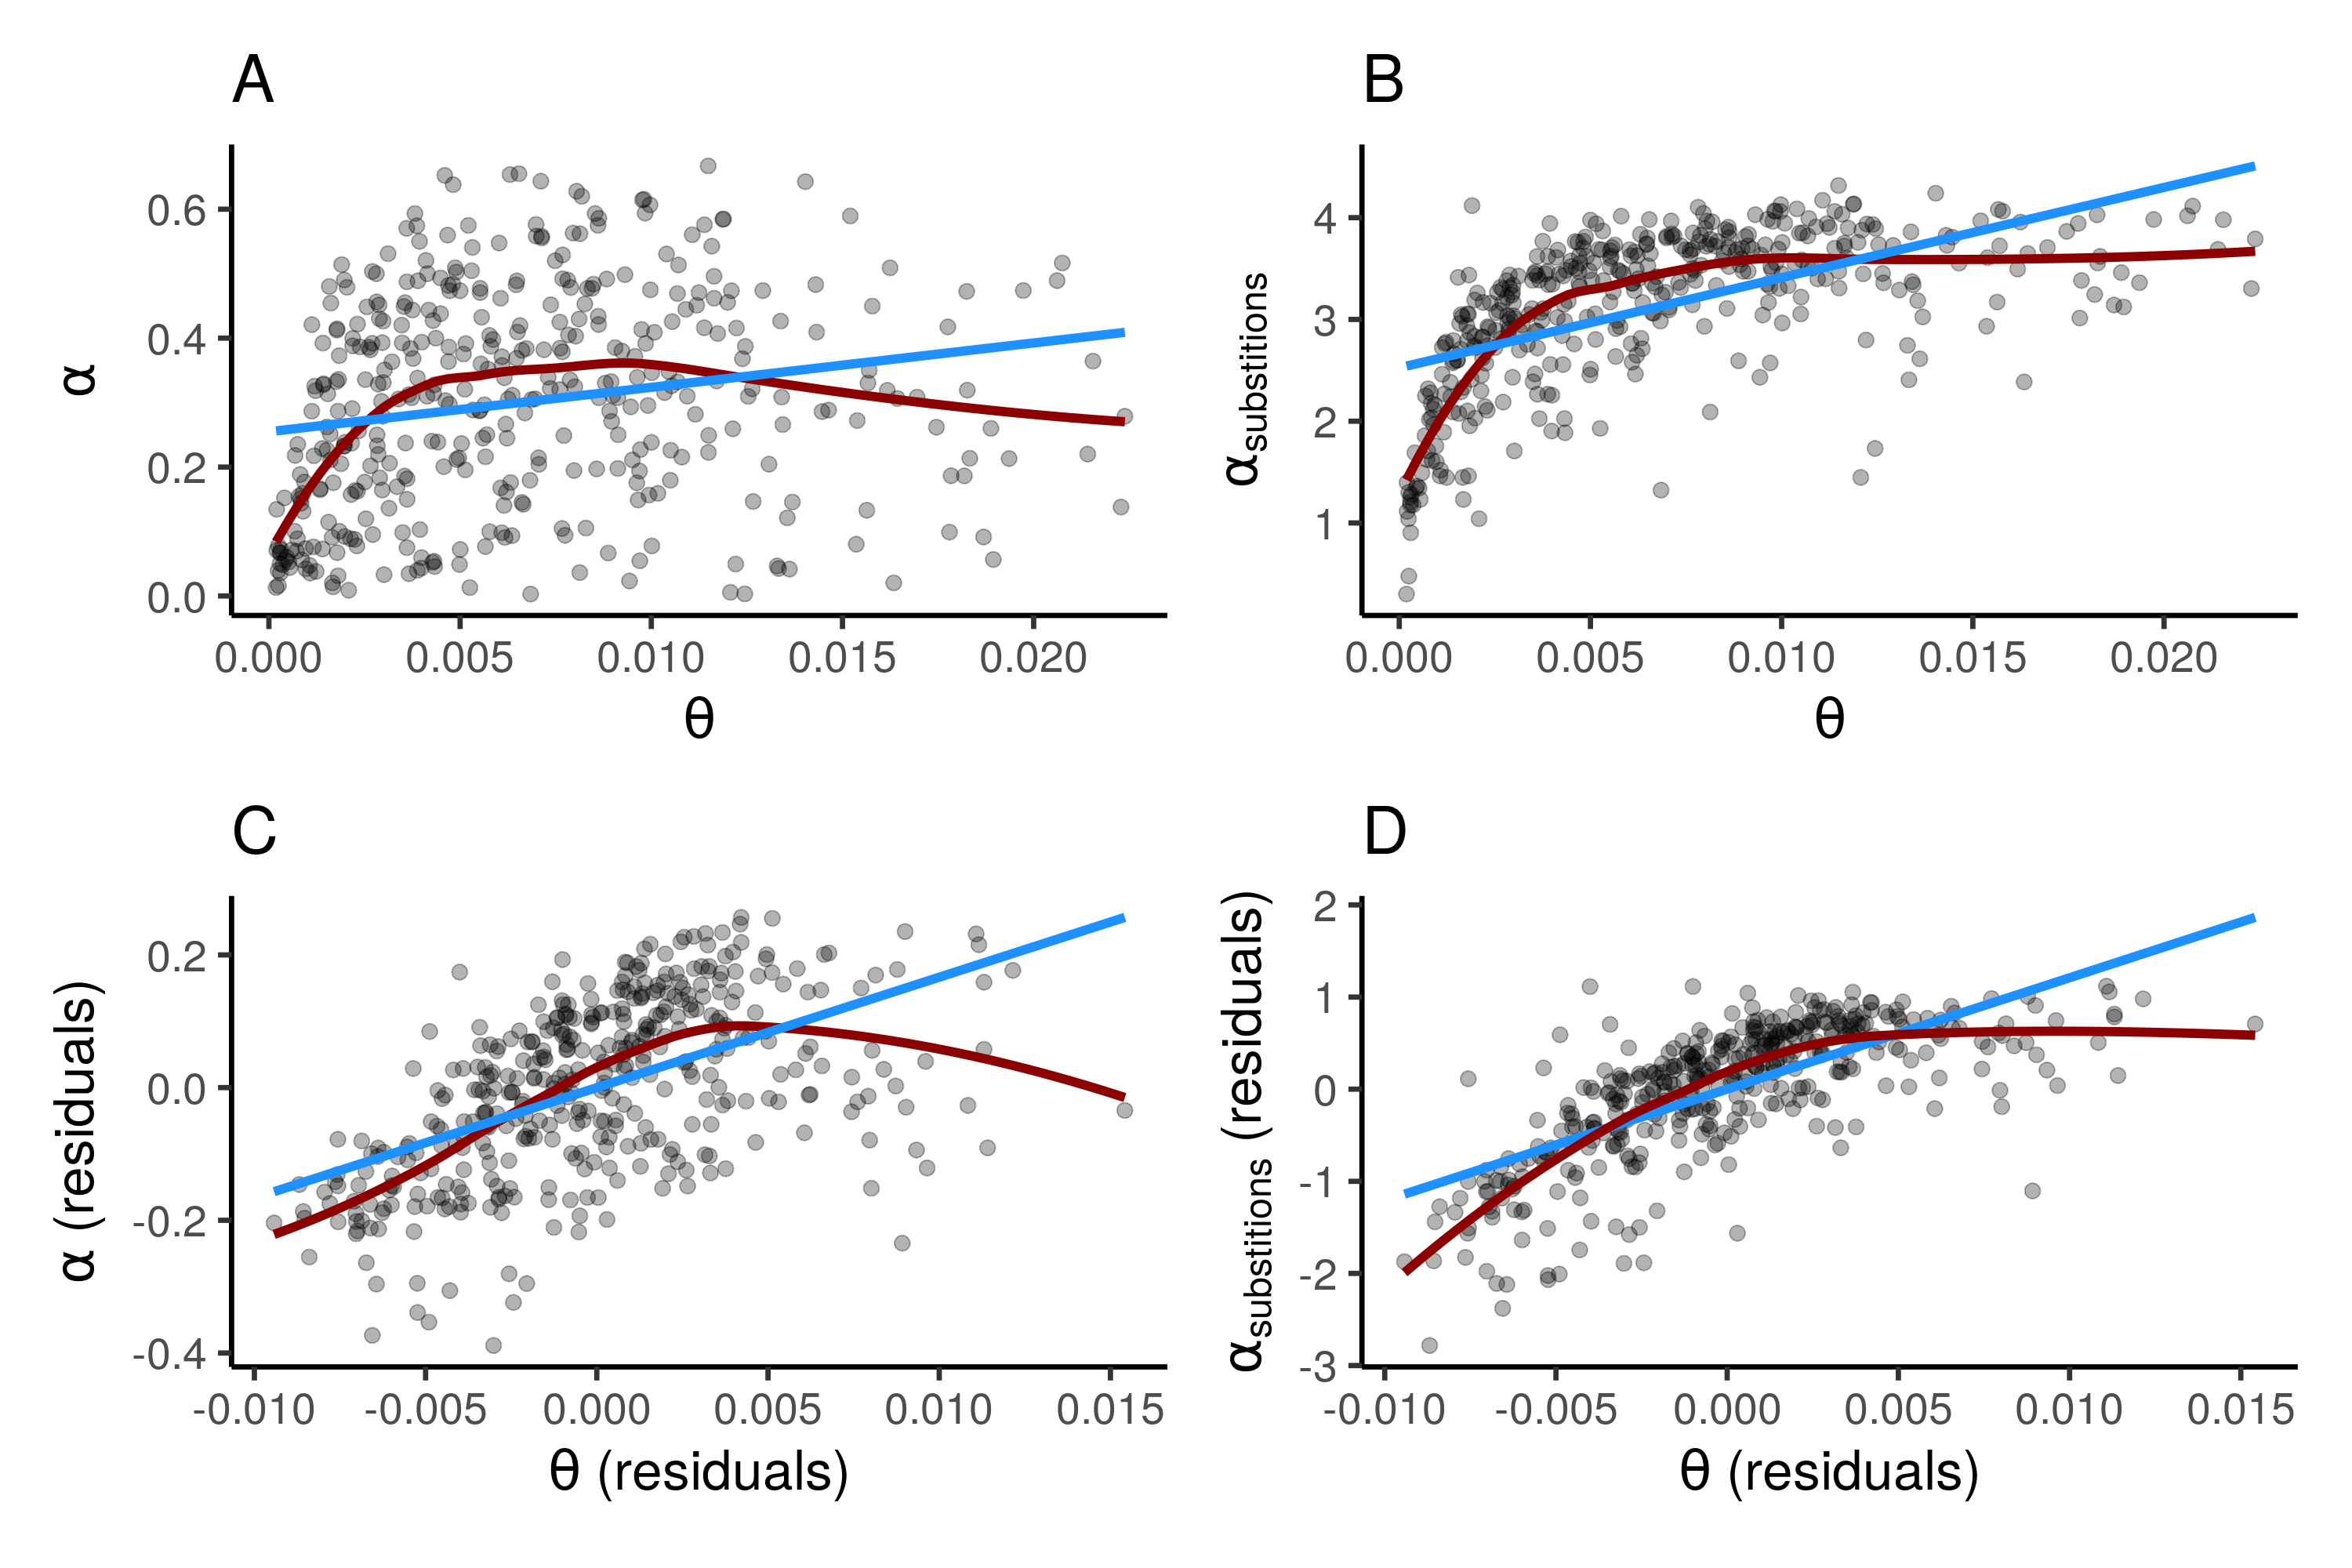

In [33]:

LWD <- 2
ALPHA  <- 0.3
theta_raw <- 
dfe_model_df %>%
    ggplot(aes(theta, alpha)) +
    geom_point(size = 3, alpha = ALPHA) +
    geom_smooth(se = F, colour = "darkred", lwd = LWD) +
    geom_smooth(method = "lm", colour = "dodgerblue", se = F, lwd = LWD) +
    xlab(expression(theta)) +
    ylab(expression(alpha))


theta_avplot <- 
theta_av %>% 
    data.frame() %>% 
    ggplot(aes(theta, alpha)) +
    geom_point(size = 3, alpha = ALPHA) +
    geom_smooth(se = F, colour = "darkred", lwd = LWD) +
    geom_smooth(method = "lm", colour = "dodgerblue", se = F, lwd = LWD) +
    xlab(expression(paste(theta, " (residuals)"))) +
    ylab(expression(paste(alpha, " (residuals)")))


rawcount_smooth <- dfe_model_df %>%
    rename(positive_mean = pos_mean) %>% 
    rename(negative_proportion = neg_prop) %>% 
    ggplot(aes(theta, alpha_count)) +
    geom_point(size = 3, alpha = ALPHA) +
    geom_smooth(se = F, colour = "darkred", lwd = LWD) +
    geom_smooth(method = "lm", colour = "dodgerblue", se = F, lwd = LWD) +
    xlab(expression(theta)) +
    ylab(expression(paste(alpha[substitions])))

 
thetacount_avplot <- 
count_av %>% 
    data.frame() %>% 
    ggplot(aes(theta, alpha_count)) +
    geom_point(size = 3, alpha = ALPHA) +
    geom_smooth(method = "lm", colour = "dodgerblue", se = F, lwd = LWD) +  
    geom_smooth(se = F, colour = "darkred", lwd = LWD) +
    xlab(expression(paste(theta, " (residuals)"))) +
    ylab(expression(paste(alpha[substitions]," (residuals)")))
 

(theta_raw + ggtitle("A")) + 
(rawcount_smooth + ggtitle("B")) + 
(theta_avplot + ggtitle("C")) +
(thetacount_avplot + ggtitle("D")) 
ggsave("../figures/supplement_slim.pdf", width = 15, height = 15)



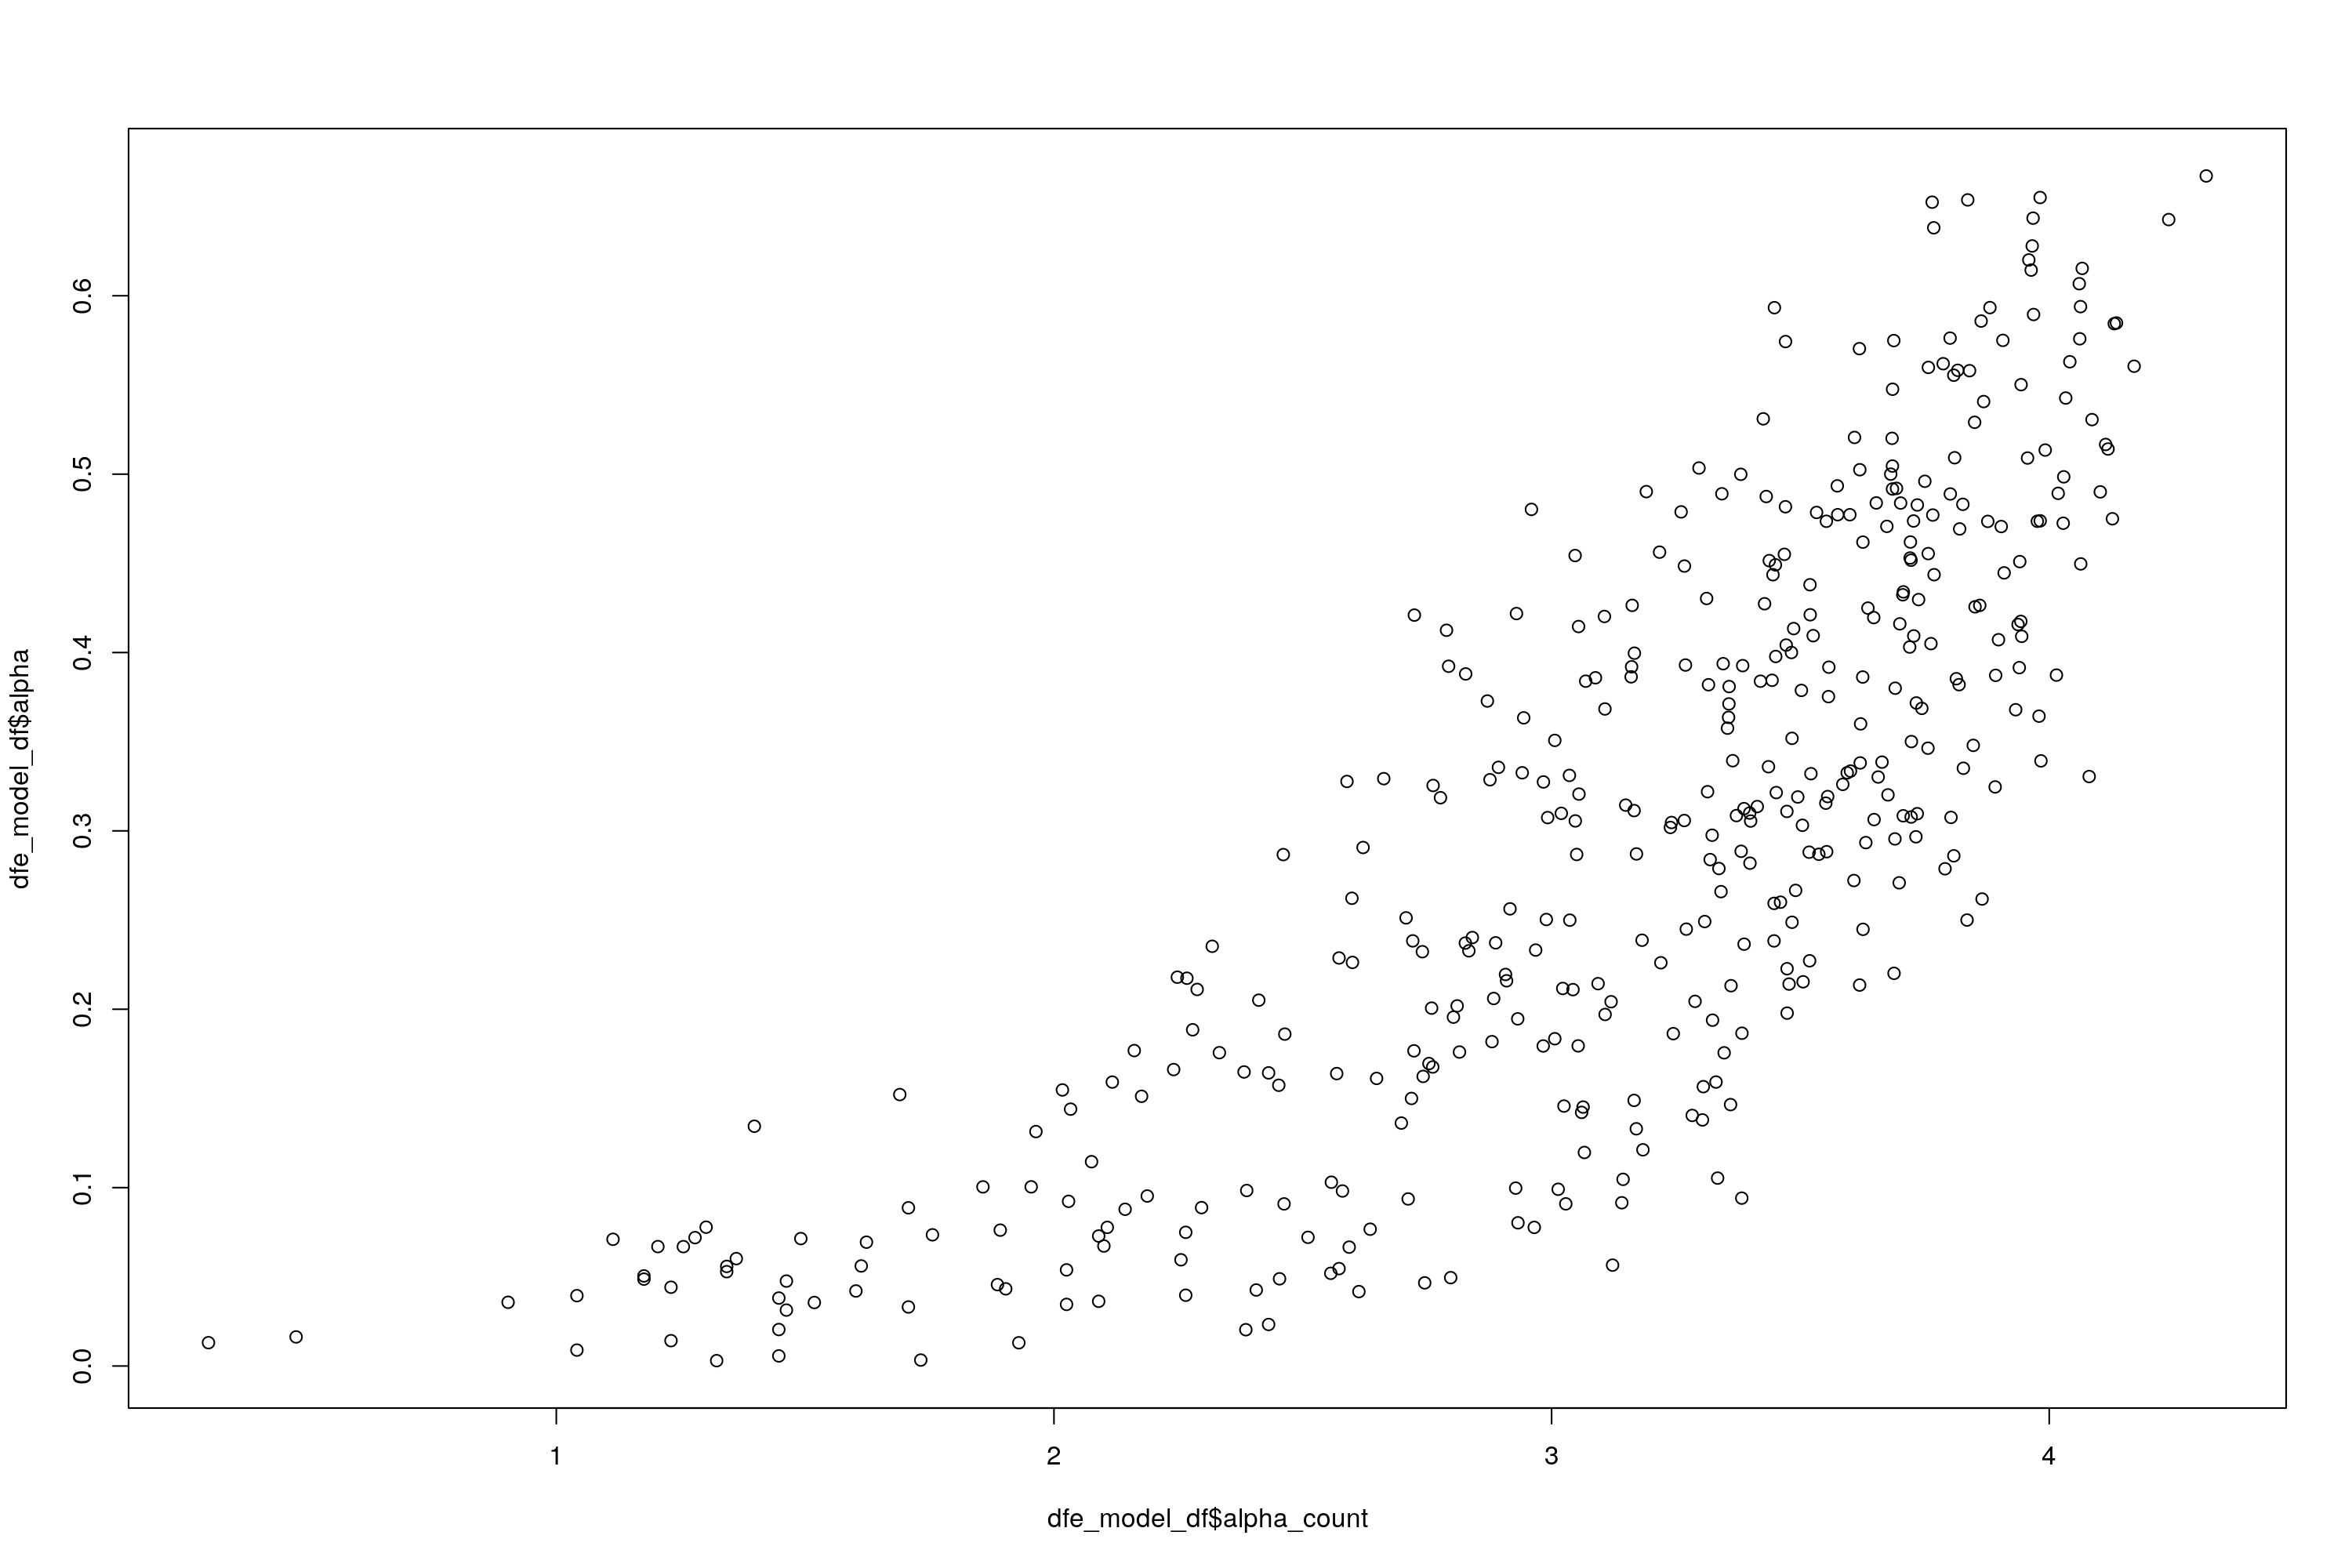

In [6]:
plot(dfe_model_df$alpha_count, dfe_model_df$alpha)